We want to somehow select members of the Hydra Supercluster of galaxies. We already have a method to select members of the clusters. But a Supercluster is composed of several clusters and filaments. So how to decide on what galaxies are part of the Supercluster as a whole? We have to define what is the supercluster in some way. The first thing I will do in this direction is to study the 3D distribution of galaxies in the region of the Supercluster using the redshifts of the galaxies we are already studying.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd

In [2]:
cm1 = plt.cm.get_cmap('jet')
cm2 = plt.cm.get_cmap('rainbow')

fontsize = 30
labelsize = 20
textsize = 15

tick_color = 'black'

color_bl = '#648FFF' #blue
color_id = '#785EF0' #indigo
color_mg = '#DC267F' #magenta
color_or = '#FE6100' #orange

#### Table with spectroscopic crossmatch

In [74]:
t = pd.read_csv("tables_photometric/Hydra-Centaurus-Gaia-Crossmatch-probgal&isoarea-specz-crossmatch.csv", usecols=["RA_1", "DEC_1", "z", "zml"])

In [75]:
ra = t["RA_1"]
dec = t["DEC_1"]
z = t["z"]
zml = t["zml"]

#### Table with only photo-zs

In [3]:
tp = pd.read_csv("tables_photometric/Hydra-Centaurus-Gaia-Crossmatch-probgal&isoarea.csv", usecols=["RA", "DEC", "zml"])

In [4]:
ra_p = tp["RA"]
dec_p = tp["DEC"]
zml = tp["zml"]

#### Defining some structures and bright galaxies in the Supercluster.
Later we create a much larger set of candidate groups and cluster in Hydra Supercluster region

In [34]:
#Substructures and bright galaxies listed in http://www.atlasoftheuniverse.com/superc/hya.html
#Centers and redshifts taken from NED

cl_names = np.array(["N3393", "ABELL 1060", "N3054", "N3087", "Antlia", "N3347", 
                     "N3250", "N3256", "N3263", "ABELL S0639", "ABELL S0631", "ABELL S0628"])

cl_ras = np.array([162.09, 159.17, 148.61, 149.78, 157.51, 160.69, 156.63, 156.96, 157.30, 160.14, 152.41, 151.53])

cl_decs = np.array([-25.16, -27.52, -25.70, -34.22, -35.32, -36.35, -39.94, -43.90, -44.12, -46.19, -39.95, -39.74])

cl_zs = np.array([0.01251, 0.01330, 0.00809, 0.00891, 0.00977, 0.01004, 0.00942, 0.00935, 0.01001, 0.02110, 0.03097, 0.03084]) 

### Plots with spectroscopic redshifts

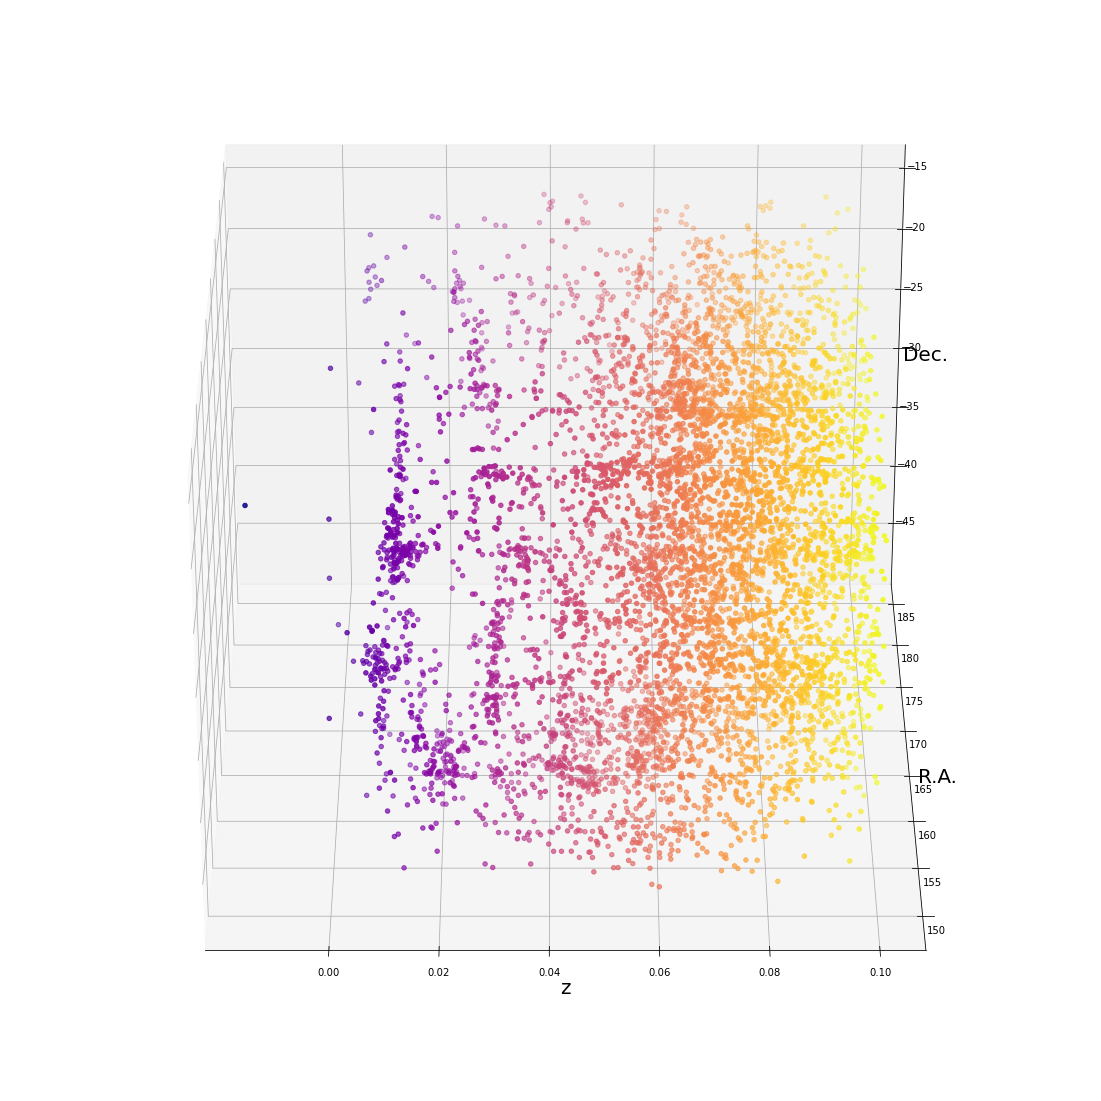

In [82]:
mask = z < 0.1
fig = plt.figure(figsize=(20, 20))
ax = plt.axes(projection='3d')
ax.scatter3D(z[mask], ra[mask], dec[mask], c=z[mask], s=20, cmap='plasma')
ax.set_ylabel('R.A.', fontsize=labelsize)
ax.set_zlabel('Dec.', fontsize=labelsize)
ax.set_xlabel('z', fontsize=labelsize)
ax.elev = 30
ax.azim = -90
ax.set_aspect('auto')

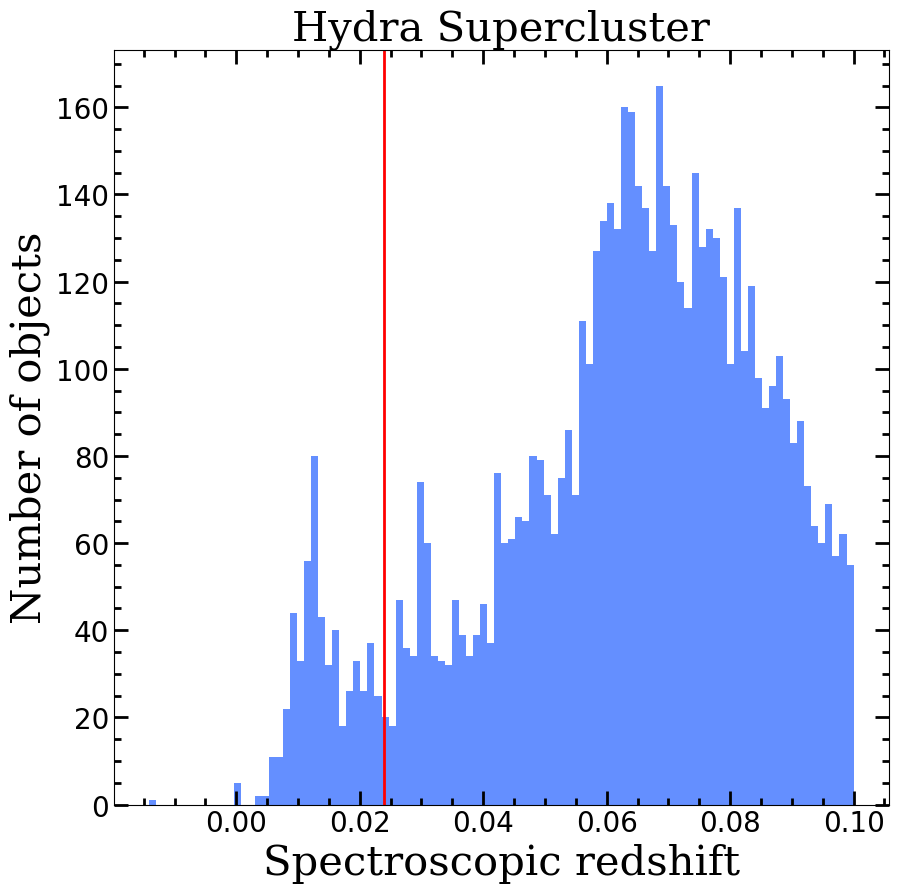

In [72]:
fig = plt.figure(figsize=(10, 10), dpi=100)
ax = fig.add_subplot(111)

bins = 100
cut = 0.024
ax.hist(z[mask], alpha=1.0, bins=bins, histtype='stepfilled', color=color_bl, lw=4.0)
ax.set_title("Hydra Supercluster", fontsize=fontsize, family='serif')
ax.set_xlabel("Spectroscopic redshift", fontsize=fontsize, family = 'serif')
ax.set_ylabel("Number of objects", fontsize=fontsize, family = 'serif')

tick_color = 'black'
ax.xaxis.set_tick_params(which='both',labelsize=labelsize, direction='in',color=tick_color,bottom=True,top=True,left=True,right=True)
ax.yaxis.set_tick_params(which='both',labelsize=labelsize, direction='in',color=tick_color,bottom=True,top=True,left=True,right=True)

plt.tick_params(which='both', width=2.0)
plt.tick_params(which='major', length=10)
plt.tick_params(which='minor', length=5)
ax.minorticks_on()

ax.axvline(cut, lw=2.0, color="red")

plt.savefig("../Figures/Hydra-Supercluster/supercluster-membership/specz-distribution-bins{}.pdf".format(bins), dpi='figure', format='pdf')

### Let's do a 3D tomography of Hydra Supercluster using spectroscopic redshifts

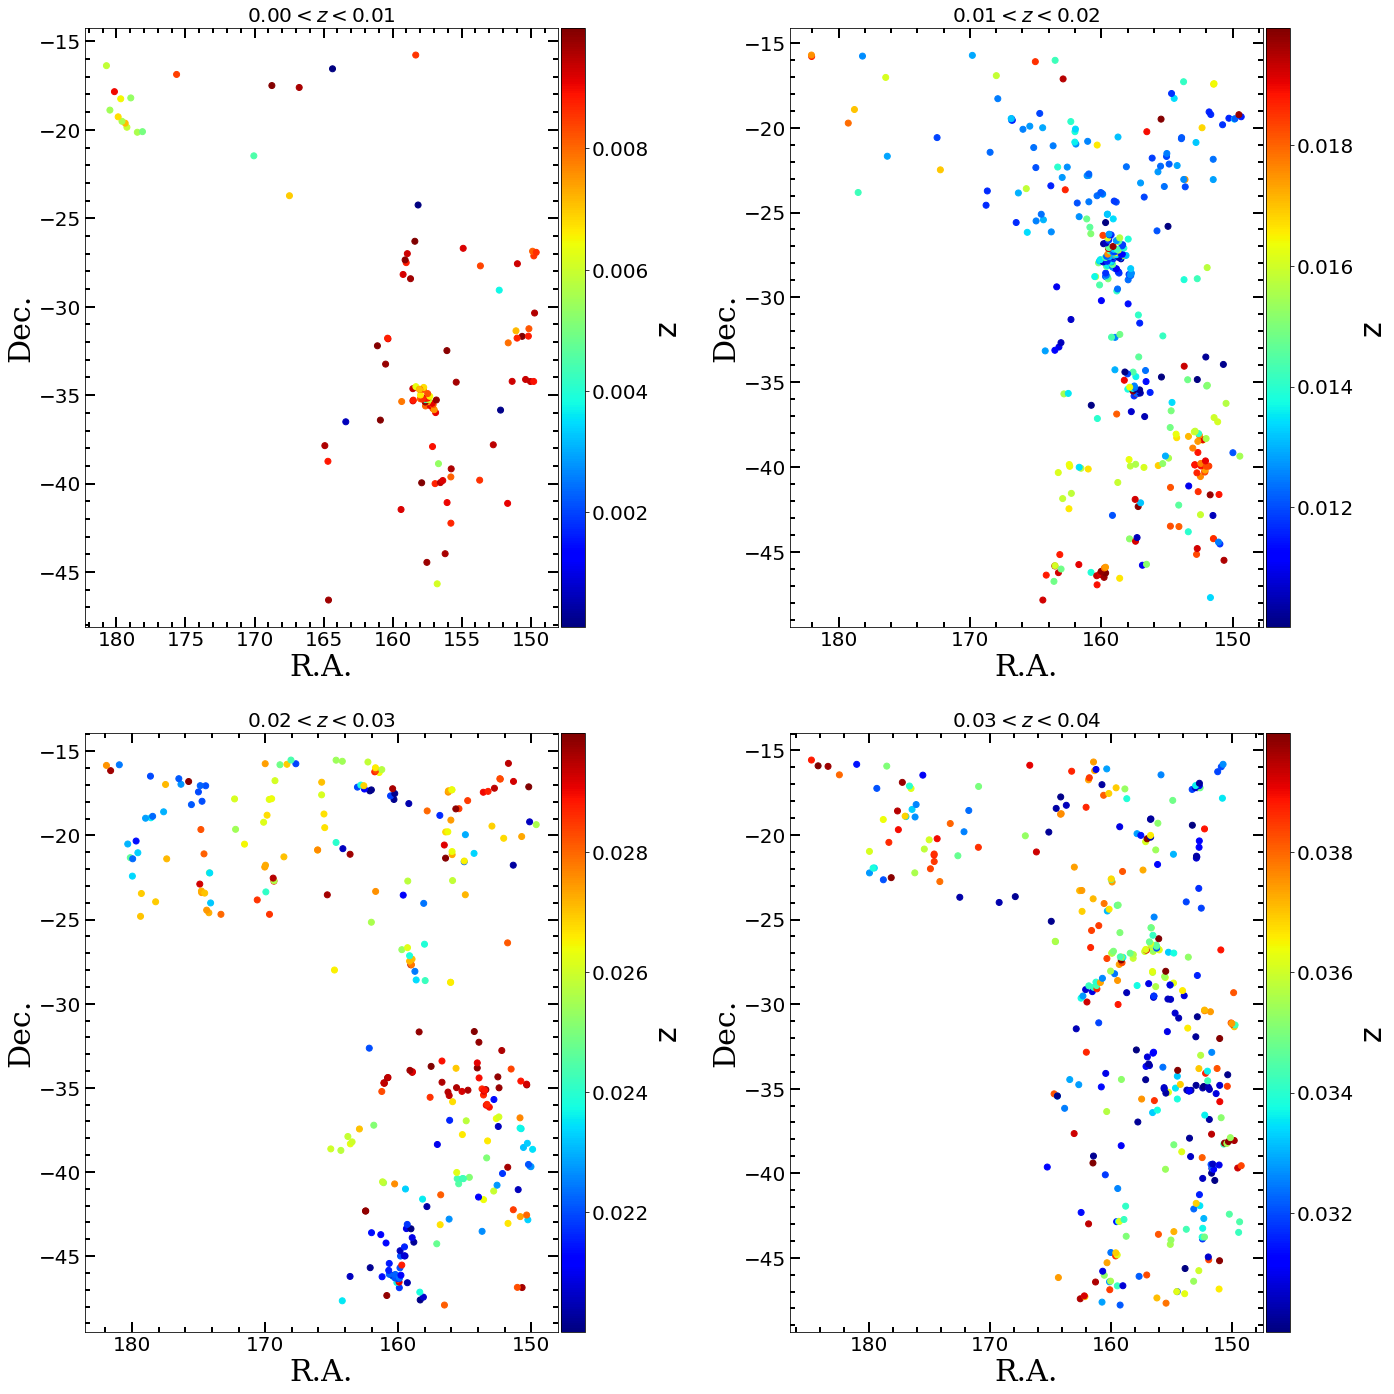

In [225]:
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

delta_z = 0.01
for z_value, i in zip(np.arange(0.0, 0.04, delta_z), range(0, 4)):
    mask = (z > z_value) & (z < (z_value + delta_z))
    ax = axs[int(i/2), i%2]
    
    sc = ax.scatter(ra[mask], dec[mask], c=z[mask], cmap=cm1)
    ax.set_xlabel("R.A.", fontsize=fontsize, family = 'serif')
    ax.set_ylabel("Dec.", fontsize=fontsize, family = 'serif')
    ax.set_title(r"${:.2f} < z < {:.2f}$".format(z_value, z_value + delta_z), fontsize=labelsize, family = 'serif')
    
    ax.tick_params(which='both', width=2.0)
    ax.tick_params(which='major', length=10)
    ax.tick_params(which='minor', length=5)
    
    tick_color = 'black'
    ax.xaxis.set_tick_params(which='both',labelsize=labelsize, direction='in',color=tick_color,bottom=True,top=True,left=True,right=True)
    ax.yaxis.set_tick_params(which='both',labelsize=labelsize, direction='in',color=tick_color,bottom=True,top=True,left=True,right=True)
    ax.minorticks_on()
    ax.invert_xaxis()
    
    divider = make_axes_locatable(ax)
    cax1 = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(sc, cax=cax1, orientation='vertical')
    cbar.set_label(label="z", fontsize=fontsize)
    cbar.ax.tick_params(labelsize=labelsize)
    
fig.tight_layout(pad=3.0)


/tmp/ipykernel_13649/2624823077.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.arange(150,  185, 1))


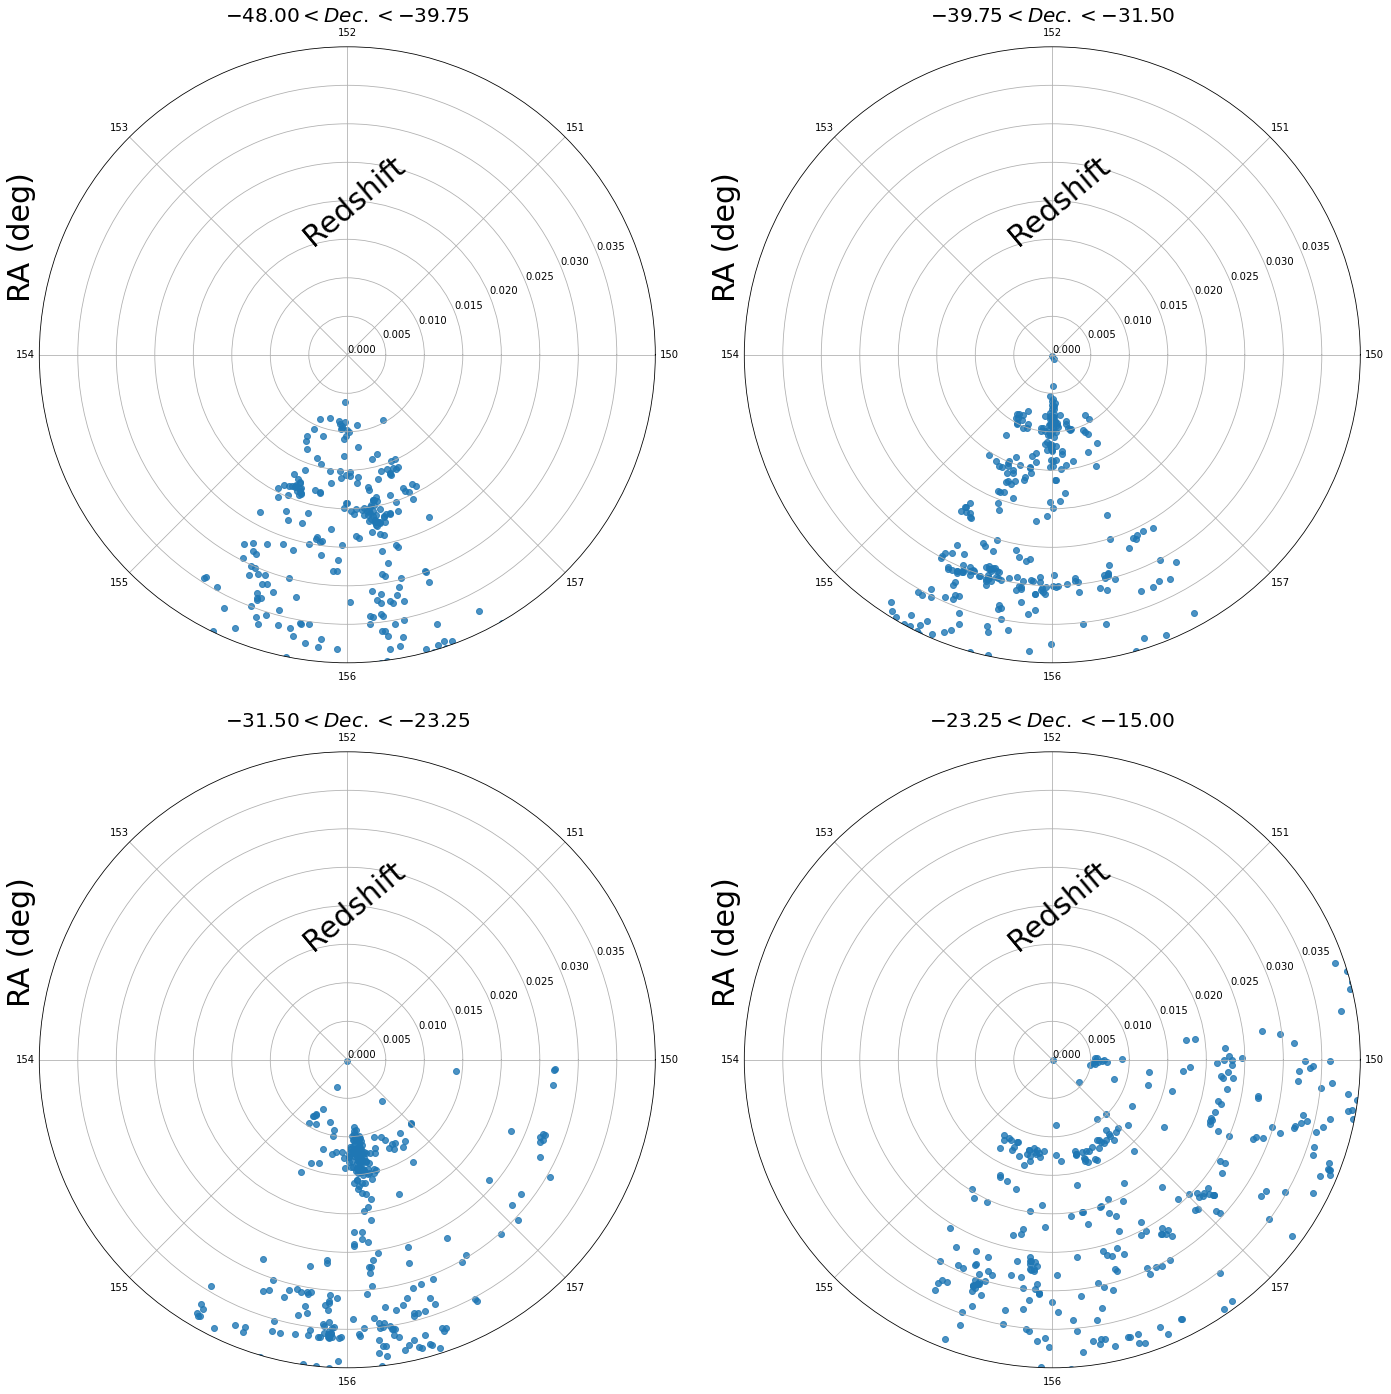

In [187]:
fig, axs = plt.subplots(2, 2, figsize=(20, 20), subplot_kw={'projection': 'polar'})

sf = 4
z_range = 0.04
delta_dec = 8.25
for dec_value, i in zip(np.arange(-48, -15, delta_dec), range(0, 4)):
    mask = (dec > dec_value) & (dec < (dec_value + delta_dec))
    
    
    ax = axs[int(i/2), i%2]
    
#     ax.scatter(sf*ra[mask]*np.pi/180, z[mask], alpha=0.8)
    ax.scatter(sf*ra[mask]*np.pi/180, z[mask], alpha=0.8)

    # Setting limits and ticks for the axes (the y-axis is the r-axis)
    ax.set_ylim(0, z_range)
    ax.set_yticks(np.arange(0.0, z_range, 0.005))
    ax.set_xticklabels(np.arange(150,  185, 1))
#     ax.set_theta_offset(sf*200*np.pi/180) 
#     ax.set_thetamax(sf*185)
#     ax.set_thetamin(sf*150)

    ax.set_title(r"${:.2f} < Dec. < {:.2f}$".format(dec_value, dec_value + delta_dec), fontsize=labelsize, family = 'serif')

    label_position=ax.get_rlabel_position()
    ax.text(np.radians(label_position+65), ax.get_rmax()*0.5,'Redshift', 
                 rotation=40, ha='center',va='center', fontsize=fontsize)
    ax.text(160*np.pi/180, z_range+0.005, 'RA (deg)', ha='center', va='center', rotation=90, fontsize=fontsize)
    ax.grid(True)
    
fig.tight_layout(pad=3.0)


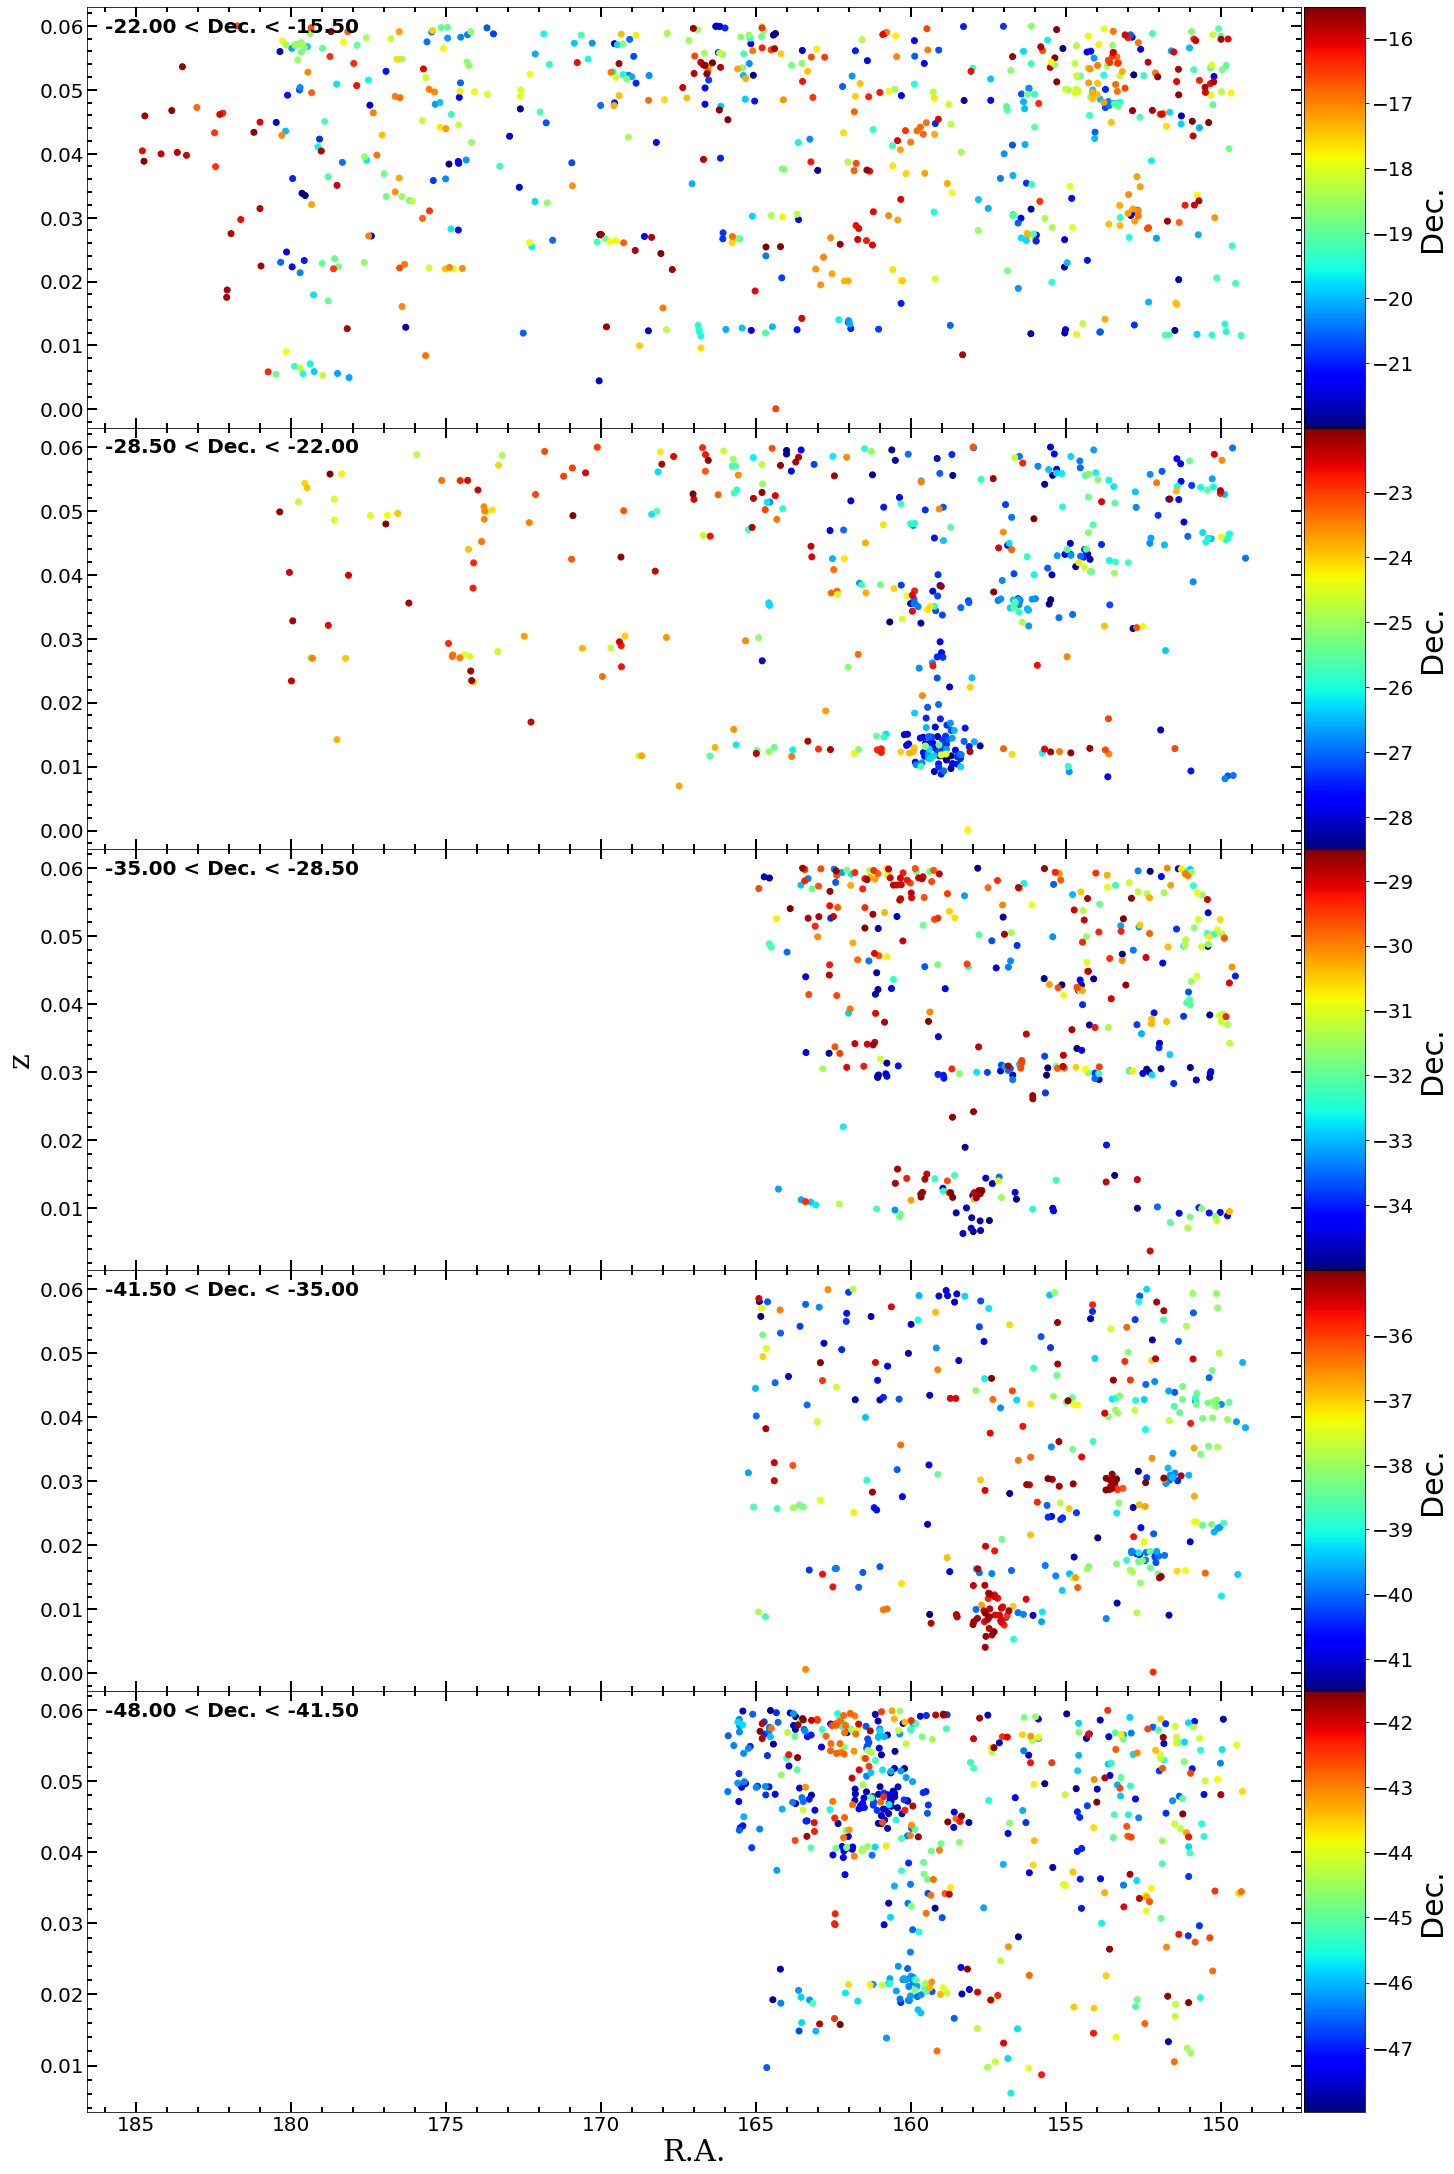

In [241]:
fig, axs = plt.subplots(5, 1, figsize=(20, 30), sharex=True)

delta_dec = 6.5
for dec_value, i in zip(np.arange(-48, -15, delta_dec), [4, 3, 2, 1, 0]):
    mask = (dec > dec_value) & (dec < (dec_value + delta_dec)) & (z < 0.06) & (z > 0)
    ax = axs[i]
    
    sc = ax.scatter(ra[mask], z[mask], c=dec[mask], cmap=cm1)
    
    ax.tick_params(which='both', width=2.0)
    ax.tick_params(which='major', length=10)
    ax.tick_params(which='minor', length=5)
    
    tick_color = 'black'

    if i < 4:
        ax.xaxis.set_tick_params(which='both',labelsize=labelsize, direction='in',color=tick_color,bottom=True,top=True,left=True,right=True, labelbottom=False)
        
    if i == 4:
        ax.xaxis.set_tick_params(which='both',labelsize=labelsize, direction='in',color=tick_color,bottom=True,top=True,left=True,right=True)
        
    ax.yaxis.set_tick_params(which='both',labelsize=labelsize, direction='in',color=tick_color,bottom=True,top=True,left=True,right=True)
    ax.minorticks_on()  
    ax.invert_xaxis()
    
    divider = make_axes_locatable(ax)
    cax1 = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(sc, cax=cax1, orientation='vertical')
    cbar.set_label(label="Dec.", fontsize=fontsize)
    cbar.ax.tick_params(labelsize=labelsize)
    
    ax.text(x=186, y=0.059, s="{:.2f} < Dec. < {:.2f}".format(dec_value, dec_value + delta_dec), fontsize=labelsize, weight='bold')
    
axs[4].set_xlabel("R.A.", fontsize=fontsize, family = 'serif')
axs[2].set_ylabel("z", fontsize=fontsize, family = 'serif')
fig.tight_layout(pad=0.0)


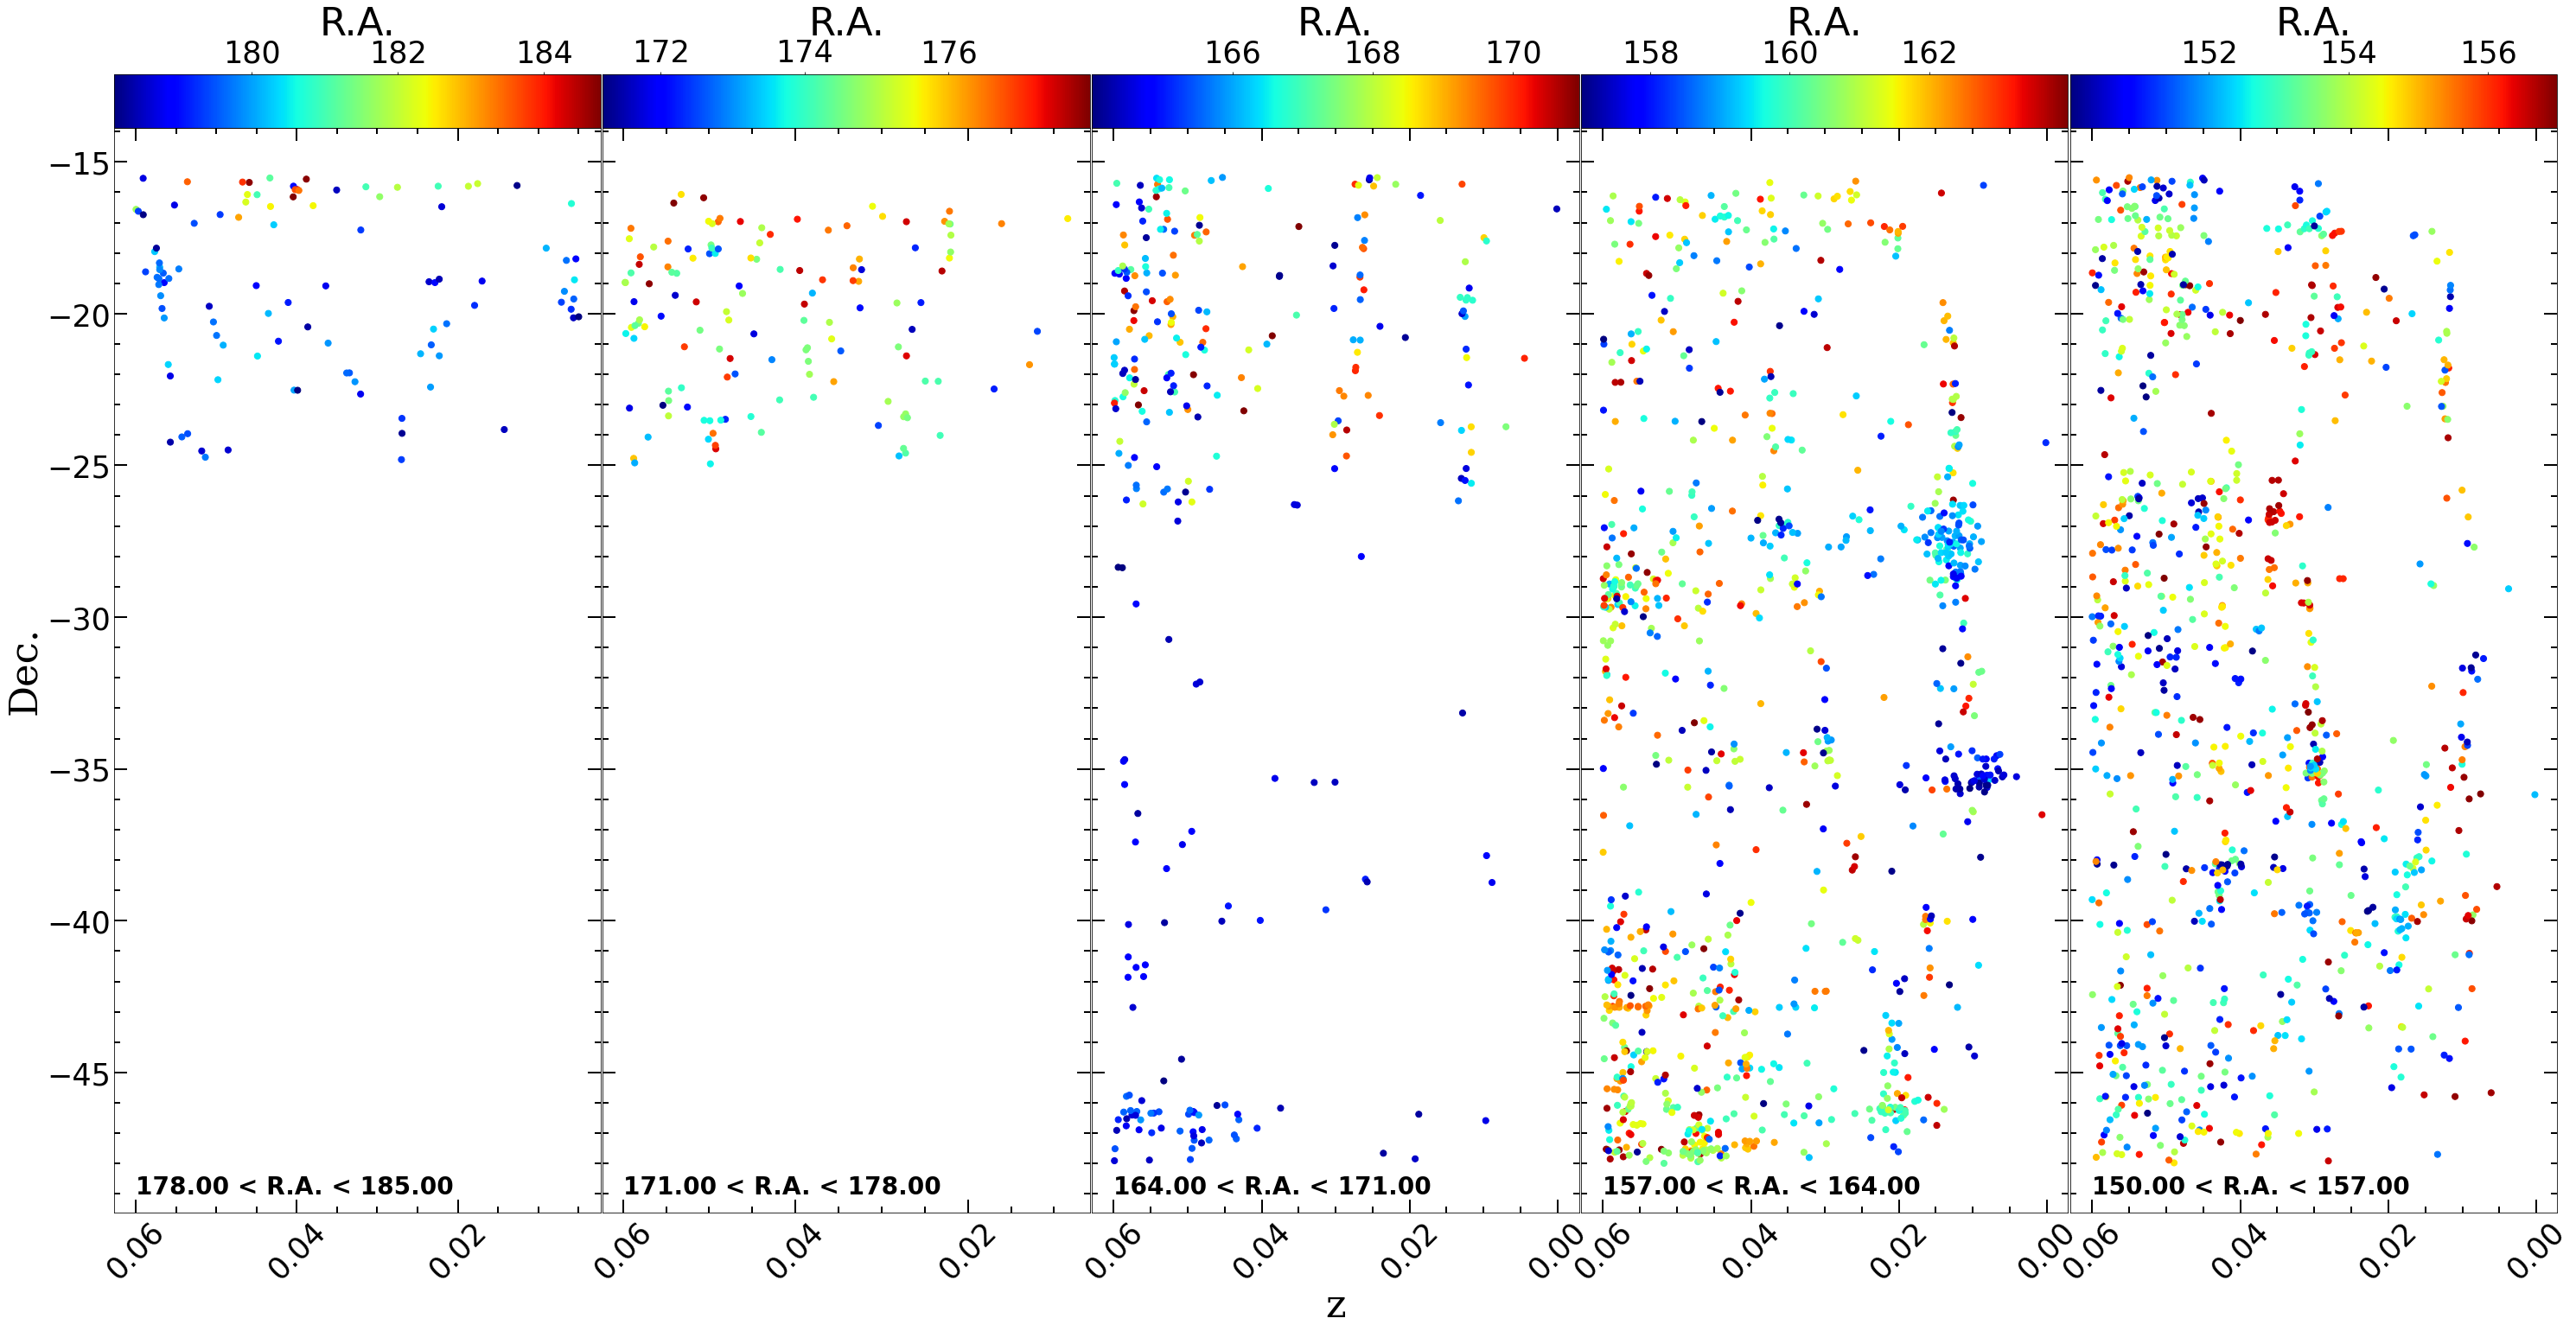

In [294]:
fontsize = 45
labelsize = 35

fig, axs = plt.subplots(1, 5, figsize=(40, 20), sharey=True)

delta_ra = 7.0
for ra_value, i in zip(np.arange(150, 185, delta_ra), [4, 3, 2, 1, 0]):
    mask = (ra > ra_value) & (ra < (ra_value + delta_ra)) & (z < 0.06) & (z > 0)
    ax = axs[i]
    
    sc = ax.scatter(z[mask], dec[mask], c=ra[mask], cmap=cm1, s=50)
    
    ax.tick_params(which='both', width=2.0)
    ax.tick_params(which='major', length=15)
    ax.tick_params(which='minor', length=7)
    
    tick_color = 'black'

    ax.xaxis.set_tick_params(which='both',labelsize=labelsize, direction='in',color=tick_color,bottom=True,top=True,left=True,right=True, rotation=45)
        
    ax.yaxis.set_tick_params(which='both',labelsize=labelsize, direction='in',color=tick_color,bottom=True,top=True,left=True,right=True)
    ax.minorticks_on()  
    ax.invert_xaxis()
    
    divider = make_axes_locatable(ax)
    cax1 = divider.append_axes('top', size='5%', pad=0)
    cbar = fig.colorbar(sc, cax=cax1, orientation='horizontal')
    cbar.set_label(label="R.A.", fontsize=fontsize, position="top")
    cbar.ax.tick_params(labelsize=labelsize)
    cbar.ax.xaxis.set_ticks_position('top')
    cbar.ax.xaxis.set_label_position('top')
    
    ax.text(y=-49, x=0.06, s="{:.2f} < R.A. < {:.2f}".format(ra_value, ra_value + delta_ra), fontsize=labelsize*0.8, weight='bold')
    
axs[2].set_xlabel("z", fontsize=fontsize, family = 'serif')
axs[0].set_ylabel("Dec.", fontsize=fontsize, family = 'serif')
fig.tight_layout(pad=-5.1)

### Now the same but with photometric redshifts

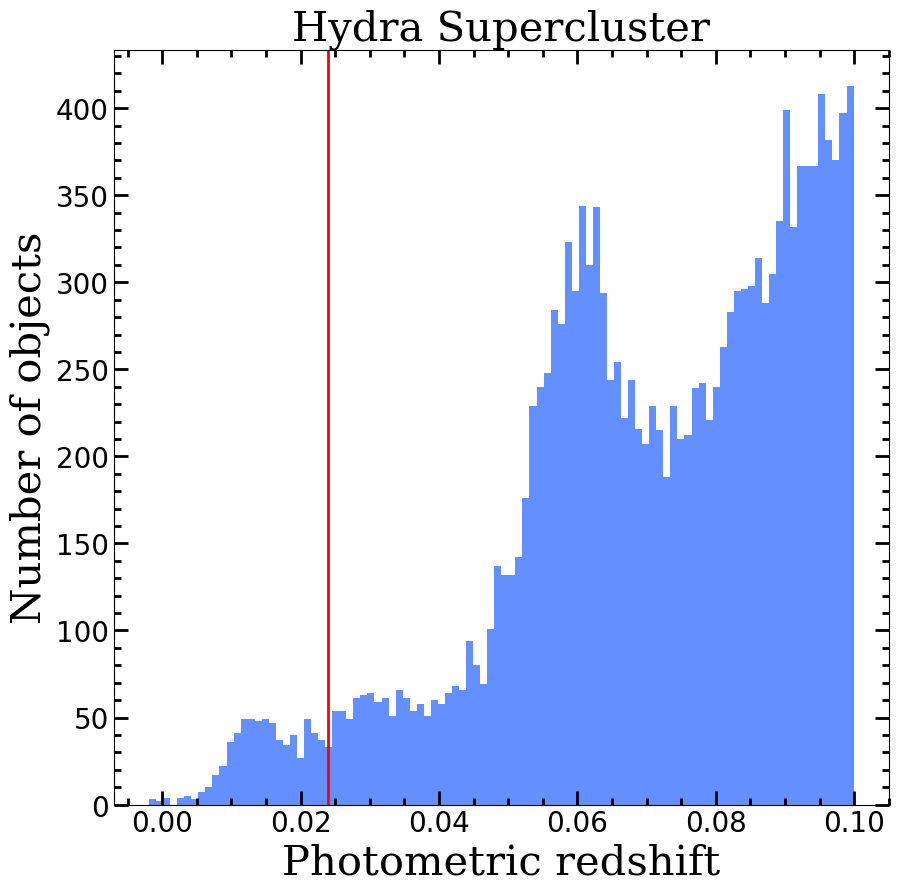

In [7]:
fig = plt.figure(figsize=(10, 10), dpi=100)
ax = fig.add_subplot(111)

bins = 100
cut = 0.024
ax.hist(zml, alpha=1.0, bins=bins, histtype='stepfilled', color=color_bl, lw=4.0)
ax.set_title("Hydra Supercluster", fontsize=fontsize, family='serif')
ax.set_xlabel("Photometric redshift", fontsize=fontsize, family = 'serif')
ax.set_ylabel("Number of objects", fontsize=fontsize, family = 'serif')

tick_color = 'black'
ax.xaxis.set_tick_params(which='both',labelsize=labelsize, direction='in',color=tick_color,bottom=True,top=True,left=True,right=True)
ax.yaxis.set_tick_params(which='both',labelsize=labelsize, direction='in',color=tick_color,bottom=True,top=True,left=True,right=True)

plt.tick_params(which='both', width=2.0)
plt.tick_params(which='major', length=10)
plt.tick_params(which='minor', length=5)
ax.minorticks_on()

ax.axvline(cut, lw=2.0, color="red")

# plt.savefig("../Figures/Hydra-Supercluster/supercluster-membership/specz-distribution-bins{}.pdf".format(bins), dpi='figure', format='pdf')

### From the above we can define a cut in photo-zs
This is similar to the cut in spec-zs we assumed before

In [ ]:
cut = 0.024

mask_galaxies_specz = z < 0.1
mask_galaxies_photoz = zml < cut
mask_groups = (z_g < cut) & (z_g > 0.005)

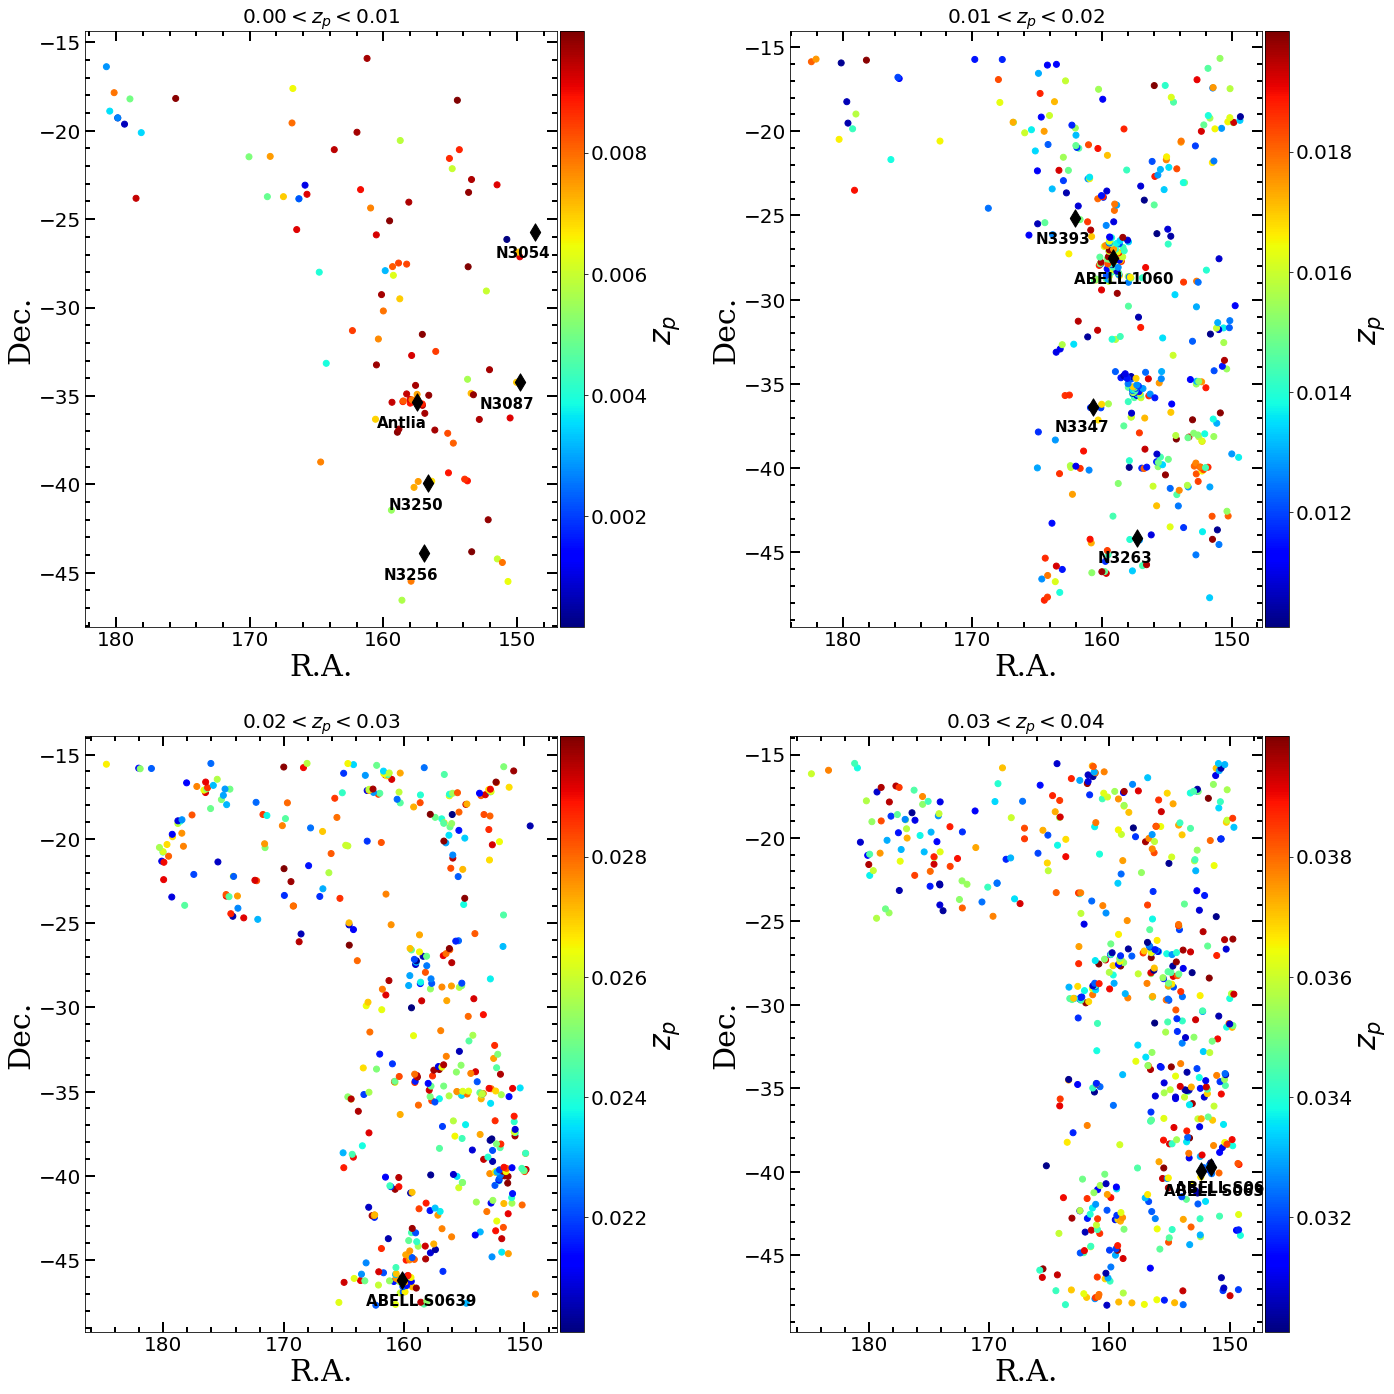

In [40]:
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

delta_zml = 0.01
for zml_value, i in zip(np.arange(0.0, 0.04, delta_zml), range(0, 4)):
    mask = (zml > zml_value) & (zml < (zml_value + delta_zml))
    mask_cl = (cl_zs > zml_value) & (cl_zs < (zml_value + delta_zml))
    ax = axs[int(i/2), i%2]
    
    sc = ax.scatter(ra_p[mask], dec_p[mask], c=zml[mask], cmap=cm1)
    ax.set_xlabel("R.A.", fontsize=fontsize, family = 'serif')
    ax.set_ylabel("Dec.", fontsize=fontsize, family = 'serif')
    ax.set_title(r"${:.2f} < z_p < {:.2f}$".format(zml_value, zml_value + delta_zml), fontsize=labelsize, family = 'serif')
    
    ax.tick_params(which='both', width=2.0)
    ax.tick_params(which='major', length=10)
    ax.tick_params(which='minor', length=5)
    
    tick_color = 'black'
    ax.xaxis.set_tick_params(which='both',labelsize=labelsize, direction='in',color=tick_color,bottom=True,top=True,left=True,right=True)
    ax.yaxis.set_tick_params(which='both',labelsize=labelsize, direction='in',color=tick_color,bottom=True,top=True,left=True,right=True)
    ax.minorticks_on()
    ax.invert_xaxis()
    
    divider = make_axes_locatable(ax)
    cax1 = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(sc, cax=cax1, orientation='vertical')
    cbar.set_label(label=r"$z_p$", fontsize=fontsize)
    cbar.ax.tick_params(labelsize=labelsize)
    
    dx = 1.0
    for ra_i, dec_i, text in zip(cl_ras[mask_cl], cl_decs[mask_cl], cl_names[mask_cl]):
        ax.scatter(ra_i, dec_i, marker='d', s = 150, color="black", zorder=3)
#         if (text == "N3256") | (text == "AS0631"): 
#             ax.text(ra_i-dx, dec_i-dx, s=text, fontsize=textsize, fontweight='bold', color='black', zorder=4)
#         else: 
        ax.text(ra_i+3*dx, dec_i-1.5*dx, s=text, fontsize=textsize, fontweight='bold', color='black', zorder=4)
    
fig.tight_layout(pad=3.0)

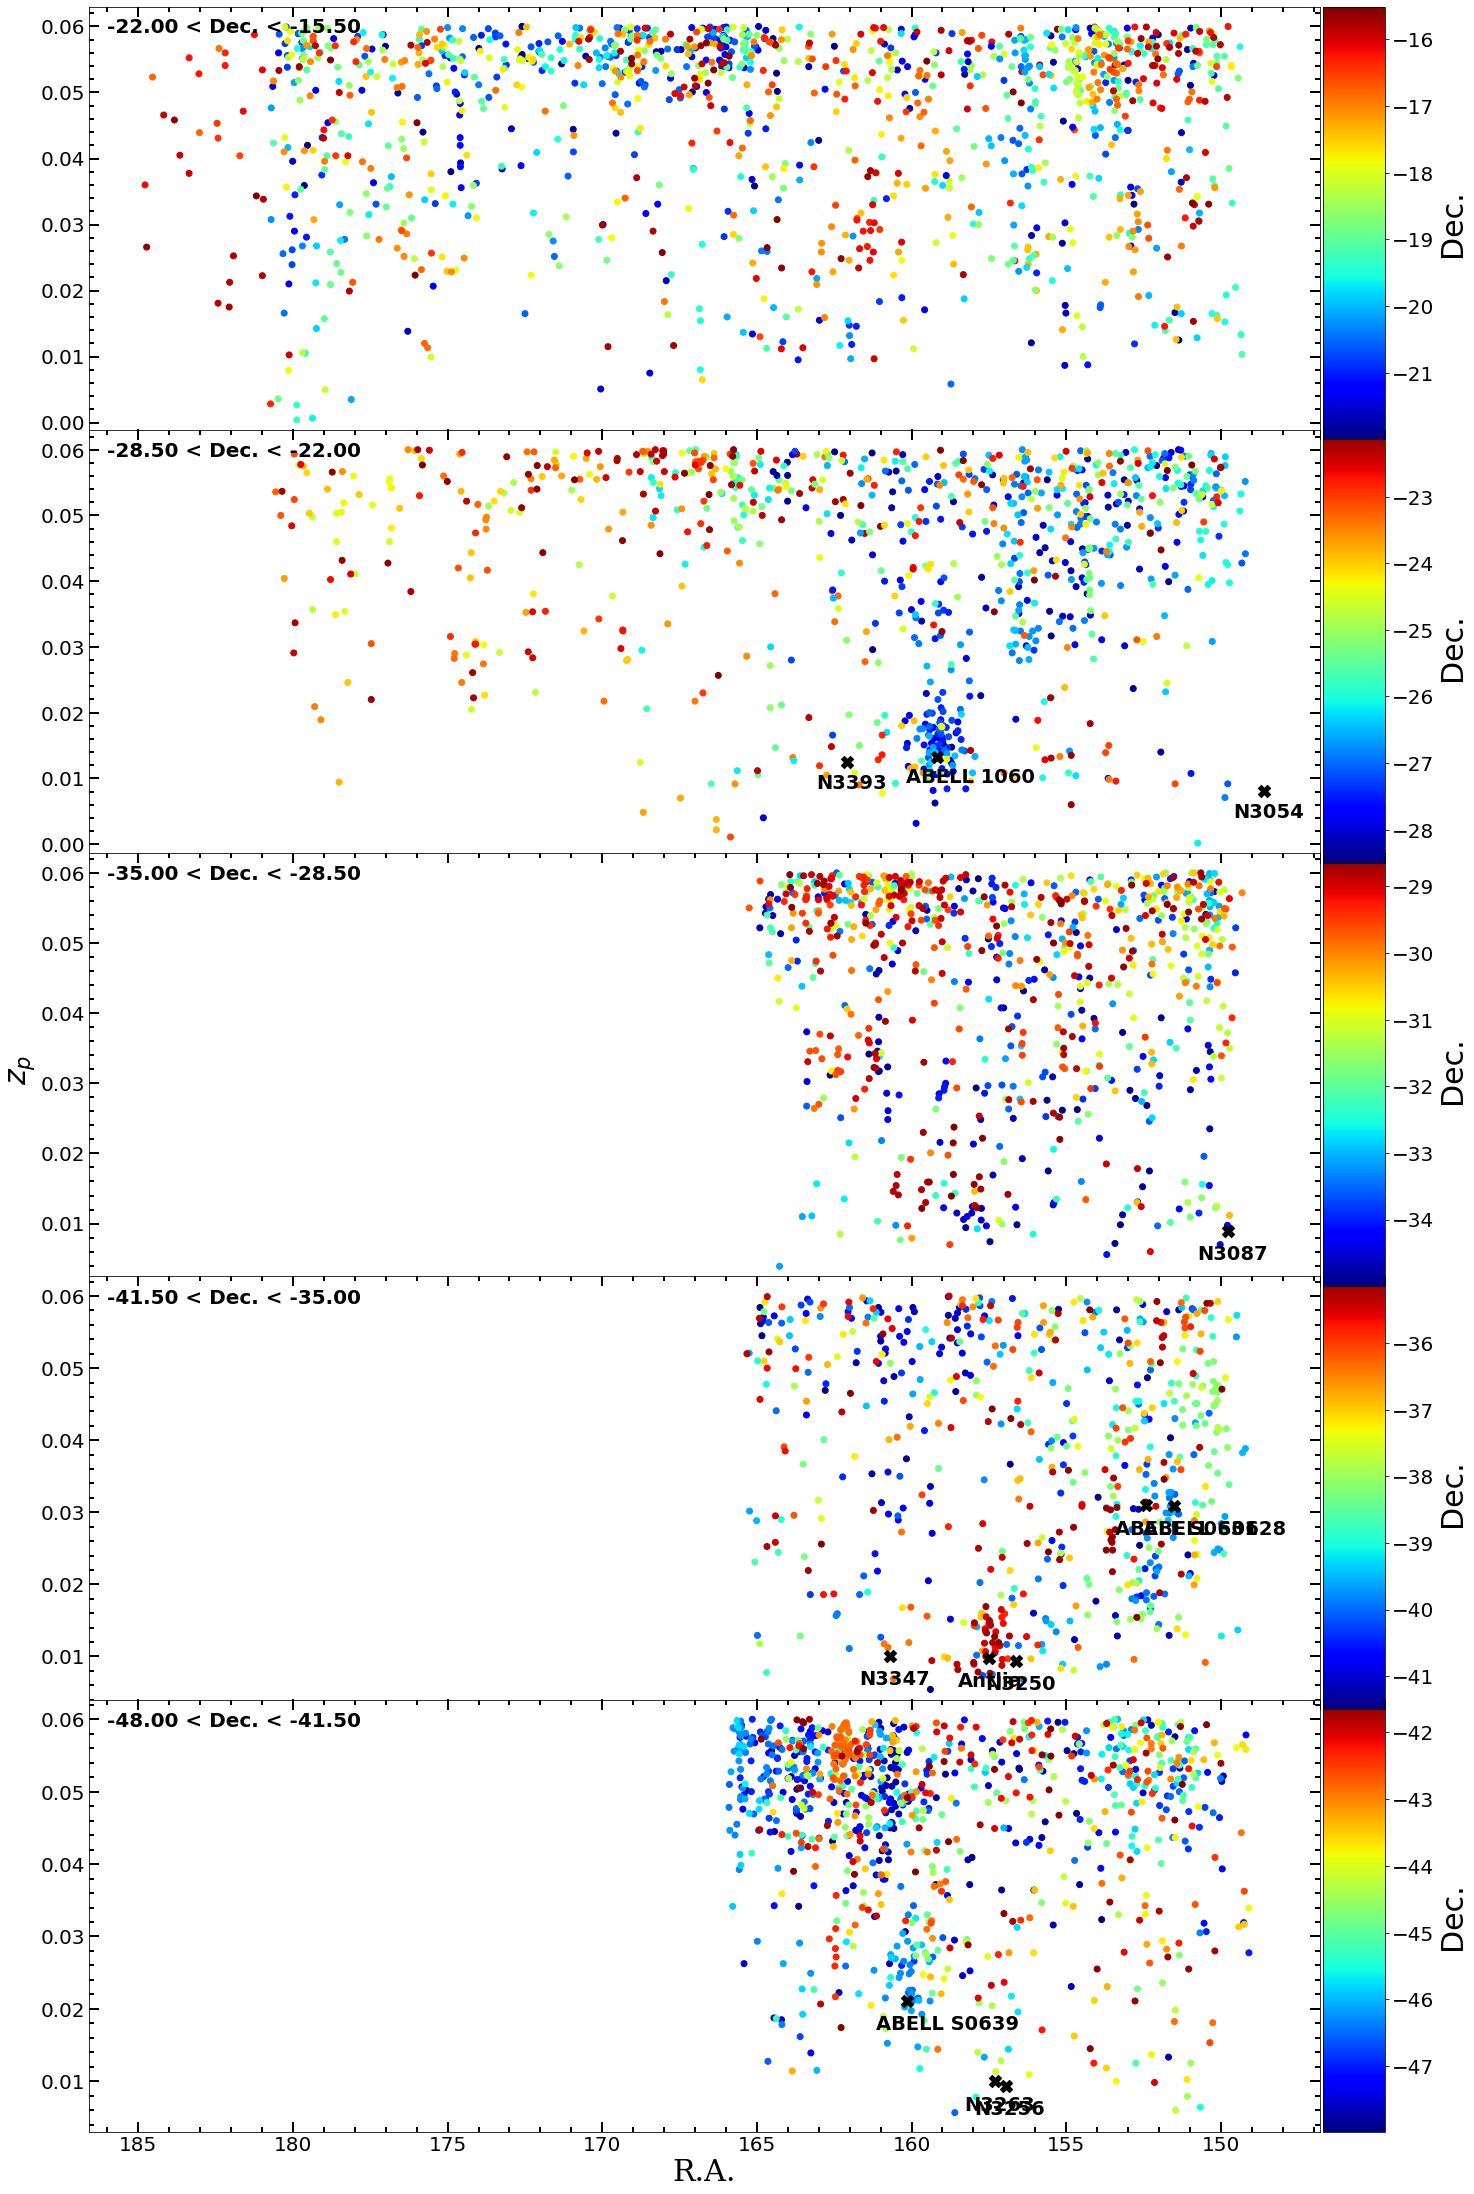

In [41]:
fig, axs = plt.subplots(5, 1, figsize=(20, 30), sharex=True)

delta_dec = 6.5
for dec_value, i in zip(np.arange(-48, -15, delta_dec), [4, 3, 2, 1, 0]):
    mask = (dec_p > dec_value) & (dec_p < (dec_value + delta_dec)) & (zml < 0.06) & (zml > 0)
    mask_cl = (cl_decs > dec_value) & (cl_decs < (dec_value + delta_dec)) 
    ax = axs[i]
    
    sc = ax.scatter(ra_p[mask], zml[mask], c=dec_p[mask], cmap=cm1)
    
    ax.tick_params(which='both', width=2.0)
    ax.tick_params(which='major', length=10)
    ax.tick_params(which='minor', length=5)
    
    tick_color = 'black'

    if i < 4:
        ax.xaxis.set_tick_params(which='both',labelsize=labelsize, direction='in',color=tick_color,bottom=True,top=True,left=True,right=True, labelbottom=False)
        
    if i == 4:
        ax.xaxis.set_tick_params(which='both',labelsize=labelsize, direction='in',color=tick_color,bottom=True,top=True,left=True,right=True)
        
    dx = 1.0
    for ra_i, z_i, text in zip(cl_ras[mask_cl], cl_zs[mask_cl], cl_names[mask_cl]):
        ax.scatter(ra_i, z_i, marker='X', s = 150, color="black", zorder=3)
        ax.text(ra_i+dx, z_i-4e-3, s=text, fontsize=textsize*1.3, fontweight='bold', color='black', zorder=4)
        
    ax.yaxis.set_tick_params(which='both',labelsize=labelsize, direction='in',color=tick_color,bottom=True,top=True,left=True,right=True)
    ax.minorticks_on()  
    ax.invert_xaxis()
    
    divider = make_axes_locatable(ax)
    cax1 = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(sc, cax=cax1, orientation='vertical')
    cbar.set_label(label="Dec.", fontsize=fontsize)
    cbar.ax.tick_params(labelsize=labelsize)
    
    ax.text(x=186, y=0.059, s="{:.2f} < Dec. < {:.2f}".format(dec_value, dec_value + delta_dec), fontsize=labelsize, weight='bold')
    
axs[4].set_xlabel("R.A.", fontsize=fontsize, family = 'serif')
axs[2].set_ylabel(r"$z_p$", fontsize=fontsize, family = 'serif')
fig.tight_layout(pad=-1.0)

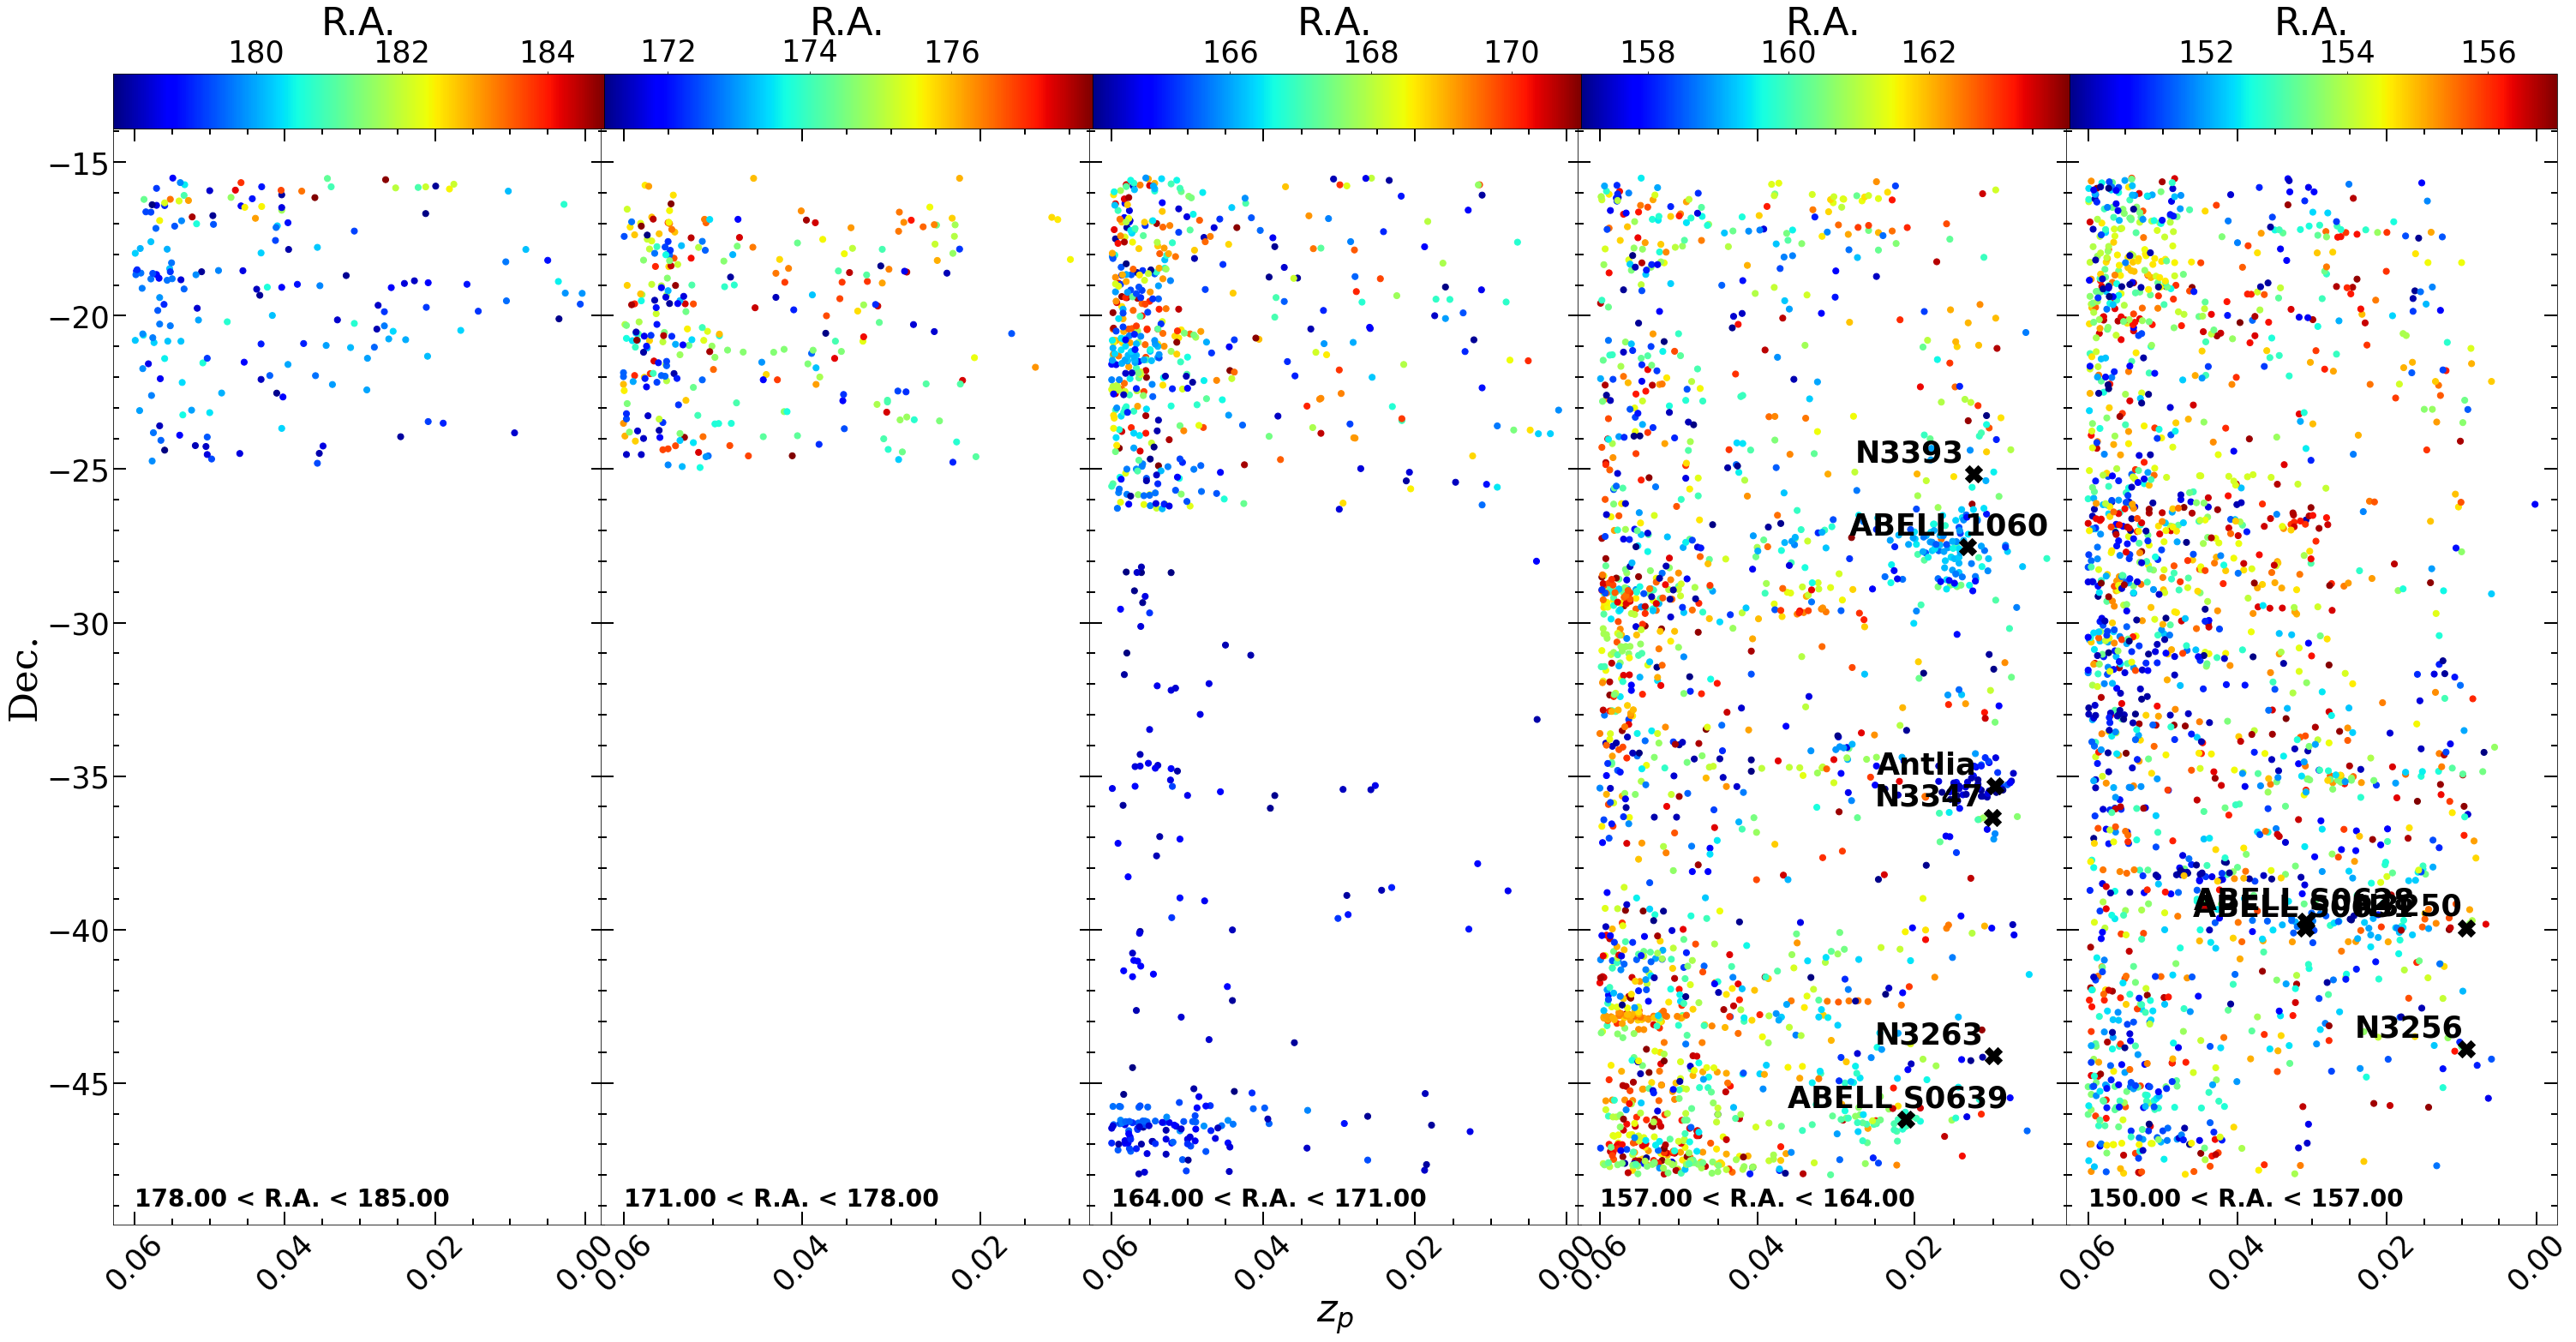

In [59]:
fontsize = 45
labelsize = 35

fig, axs = plt.subplots(1, 5, figsize=(40, 20), sharey=True)

delta_ra = 7.0
for ra_value, i in zip(np.arange(150, 185, delta_ra), [4, 3, 2, 1, 0]):
    mask = (ra > ra_value) & (ra < (ra_value + delta_ra)) & (zml < 0.06) & (zml > 0)
    mask_cl = (cl_ras > ra_value) & (cl_ras < (ra_value + delta_ra))
    ax = axs[i]
    
    sc = ax.scatter(zml[mask], dec[mask], c=ra[mask], cmap=cm1, s=50)
    
    ax.tick_params(which='both', width=2.0)
    ax.tick_params(which='major', length=15)
    ax.tick_params(which='minor', length=7)
    
    tick_color = 'black'

    ax.xaxis.set_tick_params(which='both',labelsize=labelsize, direction='in',color=tick_color,bottom=True,top=True,left=True,right=True, rotation=45)
    
    dx = 0.4
    for z_i, dec_i, text in zip(cl_zs[mask_cl], cl_decs[mask_cl], cl_names[mask_cl]):
        ax.scatter(z_i, dec_i, marker='X', s = 400, color="black", zorder=3)
        ax.text(z_i+1.5e-2, dec_i+dx, s=text, fontsize=labelsize, fontweight='bold', color='black', zorder=4)
        
    ax.yaxis.set_tick_params(which='both',labelsize=labelsize, direction='in',color=tick_color,bottom=True,top=True,left=True,right=True)
    ax.minorticks_on()  
    ax.invert_xaxis()
    
    divider = make_axes_locatable(ax)
    cax1 = divider.append_axes('top', size='5%', pad=0)
    cbar = fig.colorbar(sc, cax=cax1, orientation='horizontal')
    cbar.set_label(label="R.A.", fontsize=fontsize, position="top")
    cbar.ax.tick_params(labelsize=labelsize)
    cbar.ax.xaxis.set_ticks_position('top')
    cbar.ax.xaxis.set_label_position('top')
    
    ax.text(y=-49, x=0.06, s="{:.2f} < R.A. < {:.2f}".format(ra_value, ra_value + delta_ra), fontsize=labelsize*0.8, weight='bold')
    
axs[2].set_xlabel(r"$z_p$", fontsize=fontsize, family = 'serif')
axs[0].set_ylabel("Dec.", fontsize=fontsize, family = 'serif')
fig.tight_layout(pad=-6.4)

### Next: plot the distribution of speczs of groups and clusters in the region of Hydra Supercluster

This catalogue of groups and clusters comes from a crossmatch between the catalogue from Kourkchi & Tully (2017) and a compilation of groups and clusters from NED. Kourkchi & Tully (2017) provides information about the distance, radii and velocity dispersion for some clusters, while the compilation from NED provides the spectroscopic redshifts, which will probably be useful here. <br>

What we want to do here is a preliminary selection of candidate groups and clusters in the Hydra Supercluster, and more or less identify the volume they ocupy (a radius and a $\Delta z$).

In [7]:
g = pd.read_csv("../Groups-and-Clusters/Groups-and-clusters-NED-HS_Kourkchi&Tully2017_allin1_crossmatch.csv", usecols=["Object Name", "RA", "DEC", "Redshift"])

In [8]:
objname_g = g["Object Name"]
ra_g = g["RA"]
dec_g = g["DEC"]
z_g = g["Redshift"]

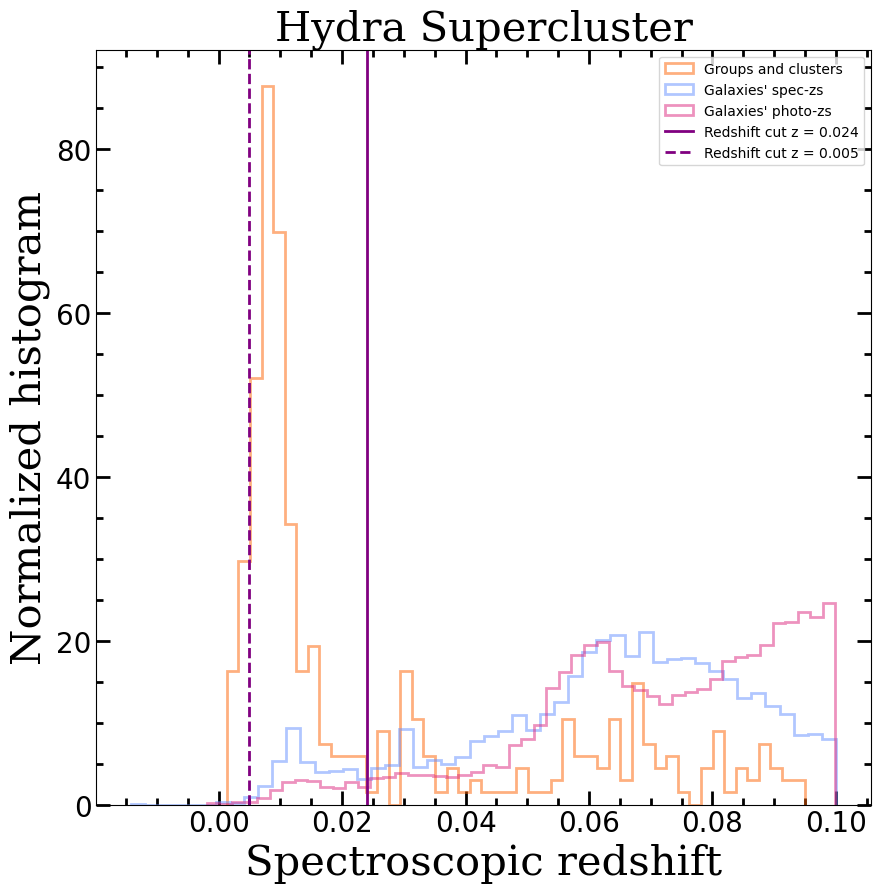

In [10]:
fig = plt.figure(figsize=(10, 10), dpi=100)
ax = fig.add_subplot(111)

bins = 50

ax.hist(z_g[z_g < 0.1], alpha=0.5, bins=bins, histtype="step", color=color_or, lw=2.0, density=True, label="Groups and clusters")
ax.hist(z[mask_galaxies_specz], alpha=0.5, bins=bins, histtype='step', color=color_bl, lw=2.0, density=True, label="Galaxies' spec-zs")
ax.hist(zml, alpha=0.5, bins=bins, histtype='step', color=color_mg, lw=2.0, density=True, label="Galaxies' photo-zs")
ax.set_title("Hydra Supercluster", fontsize=fontsize, family='serif')
ax.set_xlabel("Spectroscopic redshift", fontsize=fontsize, family = 'serif')
ax.set_ylabel("Normalized histogram", fontsize=fontsize, family = 'serif')

tick_color = 'black'
ax.xaxis.set_tick_params(which='both',labelsize=labelsize, direction='in',color=tick_color,bottom=True,top=True,left=True,right=True)
ax.yaxis.set_tick_params(which='both',labelsize=labelsize, direction='in',color=tick_color,bottom=True,top=True,left=True,right=True)

plt.tick_params(which='both', width=2.0)
plt.tick_params(which='major', length=10)
plt.tick_params(which='minor', length=5)
ax.minorticks_on()

ax.axvline(cut, lw=2.0, color="purple", label="Redshift cut z = {:.2}".format(cut))
ax.axvline(0.005, lw=2.0, color="purple", linestyle='dashed', label="Redshift cut z = {:.2}".format(0.005))
plt.legend()
# ax.text()

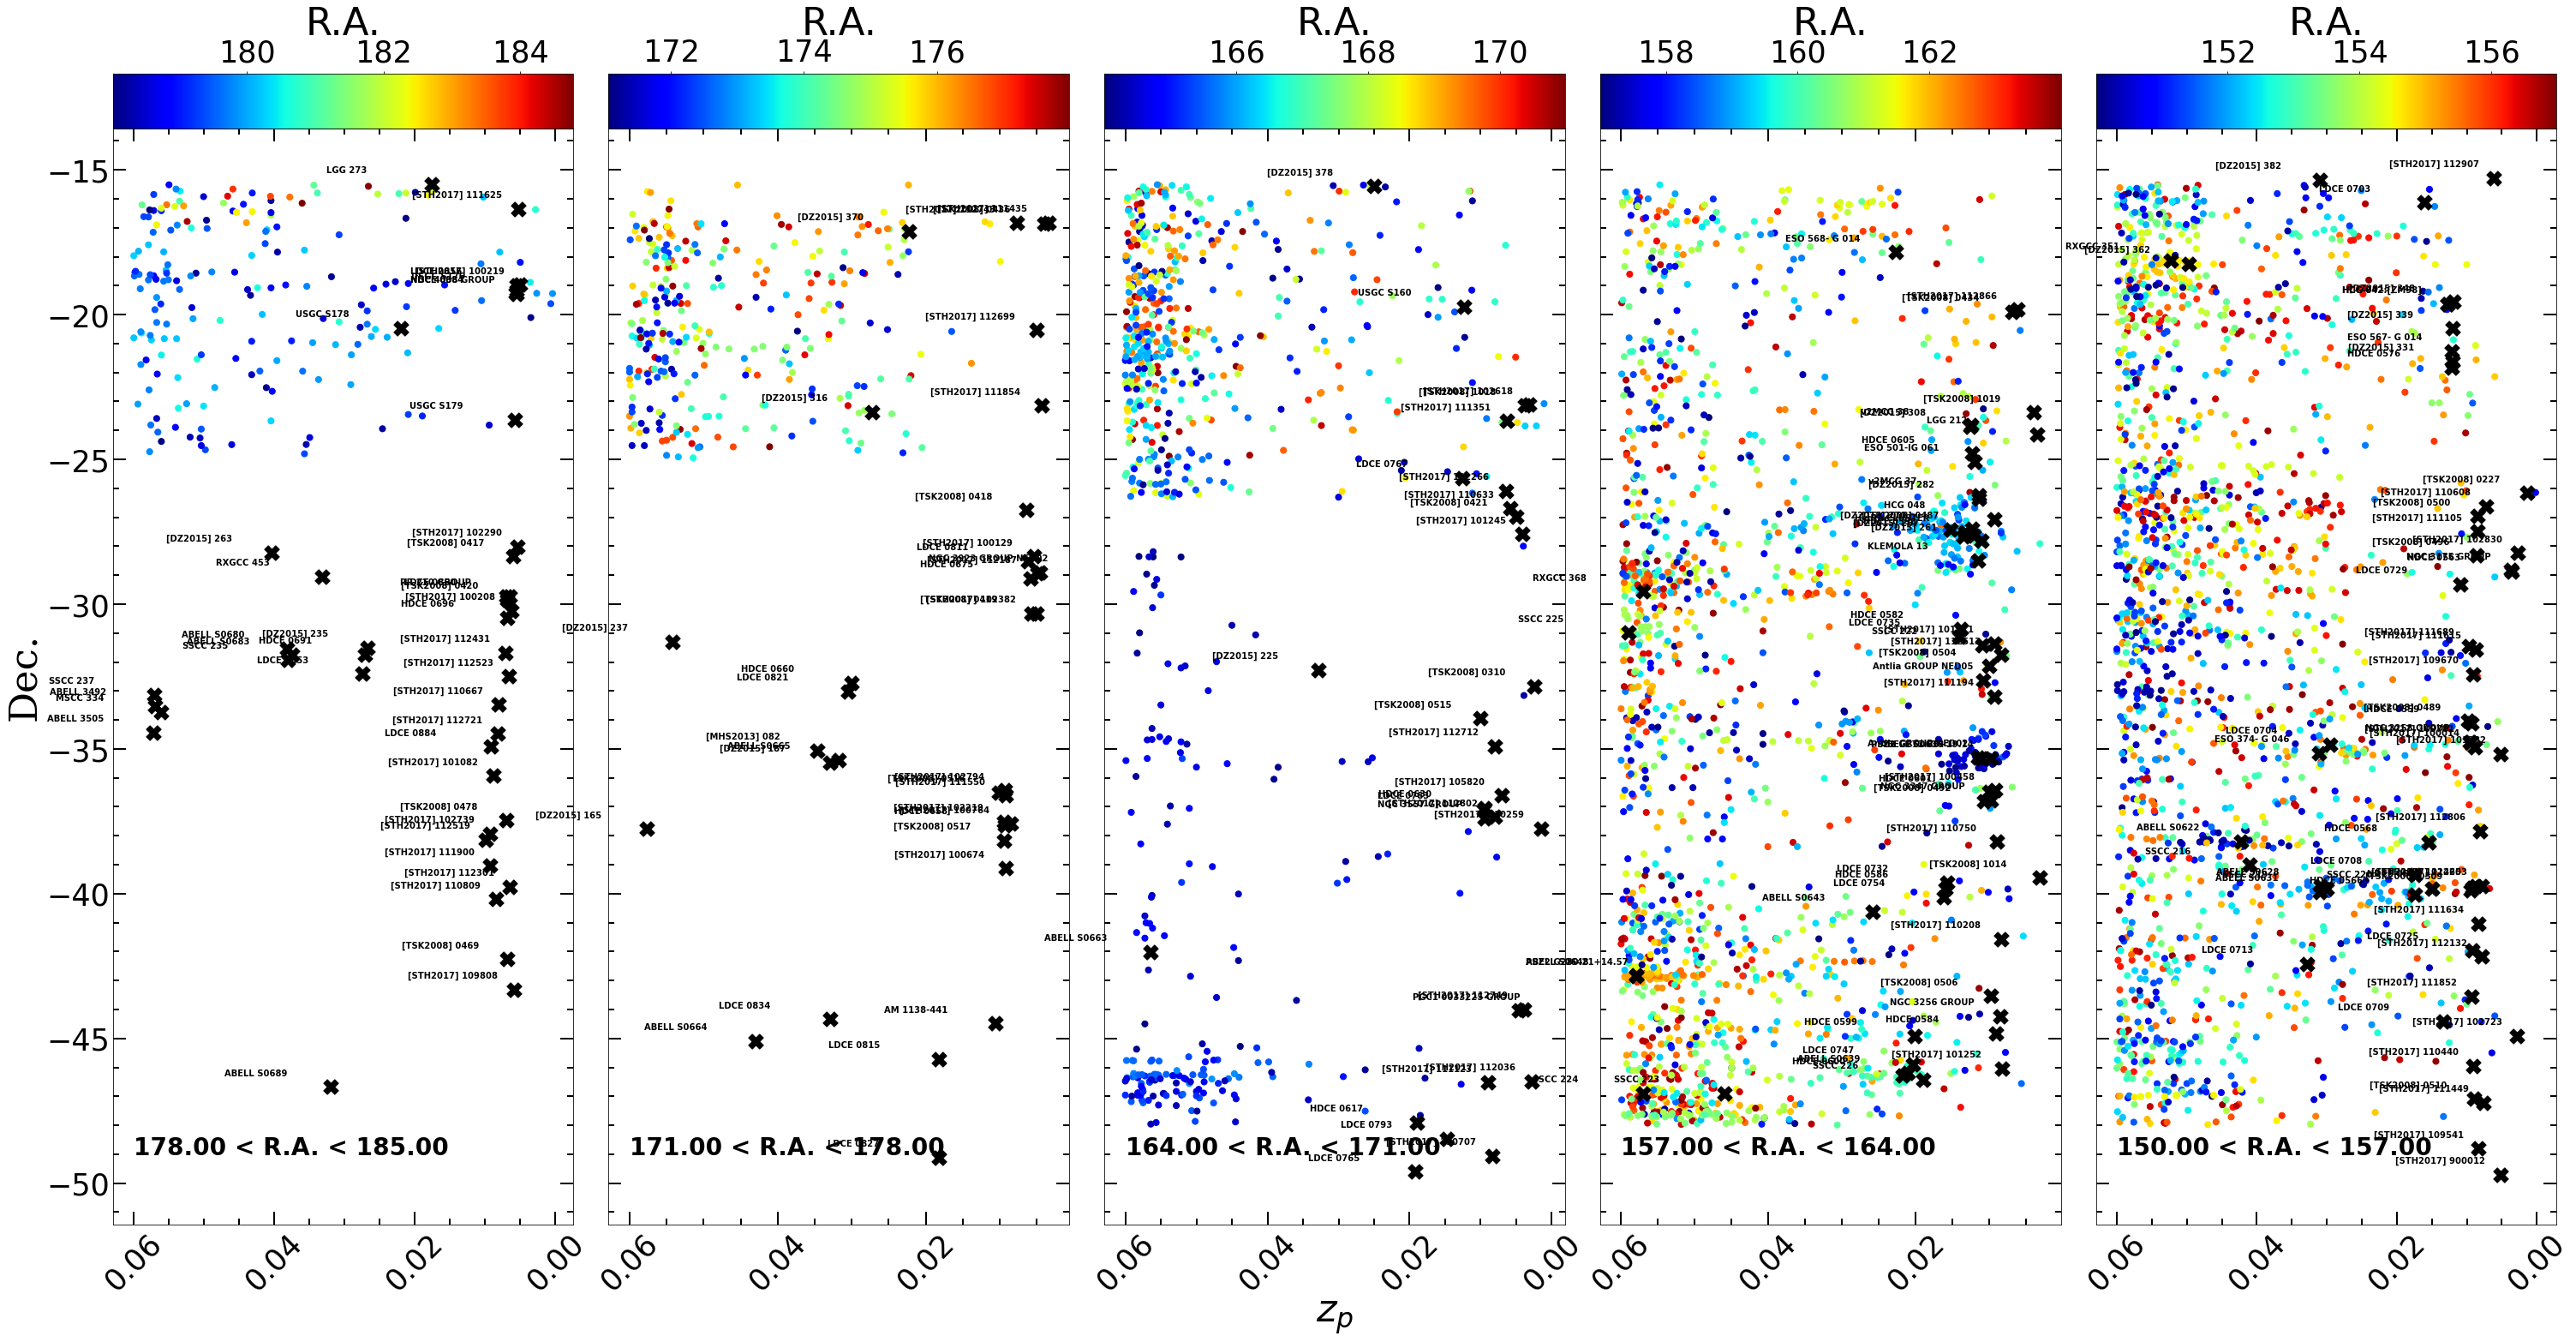

In [53]:
fontsize = 45
labelsize = 35

fig, axs = plt.subplots(1, 5, figsize=(40, 20), sharey=True)

delta_ra = 7.0
for ra_value, i in zip(np.arange(150, 185, delta_ra), [4, 3, 2, 1, 0]):
    mask = (ra > ra_value) & (ra < (ra_value + delta_ra)) & (zml < 0.06) & (zml > 0)
    mask_g = (ra_g > ra_value) & (ra_g < (ra_value + delta_ra)) & (z_g < 0.06)
    ax = axs[i]
    
    sc = ax.scatter(zml[mask], dec[mask], c=ra[mask], cmap=cm1, s=50)
    
    ax.tick_params(which='both', width=2.0)
    ax.tick_params(which='major', length=15)
    ax.tick_params(which='minor', length=7)
    
    tick_color = 'black'

    ax.xaxis.set_tick_params(which='both',labelsize=labelsize, direction='in',color=tick_color,bottom=True,top=True,left=True,right=True, rotation=45)
    
    dx = 0.4
    for z_i, dec_i, text in zip(z_g[mask_g], dec_g[mask_g], objname_g[mask_g]):
        ax.scatter(z_i, dec_i, marker='X', s = 300, color="black", zorder=3)
        ax.text(z_i+1.5e-2, dec_i+dx, s=text, fontsize=10, fontweight='bold', color='black', zorder=4)
        
    ax.yaxis.set_tick_params(which='both',labelsize=labelsize, direction='in',color=tick_color,bottom=True,top=True,left=True,right=True)
    ax.minorticks_on()  
    ax.invert_xaxis()
    
    divider = make_axes_locatable(ax)
    cax1 = divider.append_axes('top', size='5%', pad=0)
    cbar = fig.colorbar(sc, cax=cax1, orientation='horizontal')
    cbar.set_label(label="R.A.", fontsize=fontsize, position="top")
    cbar.ax.tick_params(labelsize=labelsize)
    cbar.ax.xaxis.set_ticks_position('top')
    cbar.ax.xaxis.set_label_position('top')
    
    ax.text(y=-49, x=0.06, s="{:.2f} < R.A. < {:.2f}".format(ra_value, ra_value + delta_ra), fontsize=labelsize*0.8, weight='bold')
    
axs[2].set_xlabel(r"$z_p$", fontsize=fontsize, family = 'serif')
axs[0].set_ylabel("Dec.", fontsize=fontsize, family = 'serif')
fig.tight_layout(pad=-6.4)

Text(0, 0.5, 'Dec.')

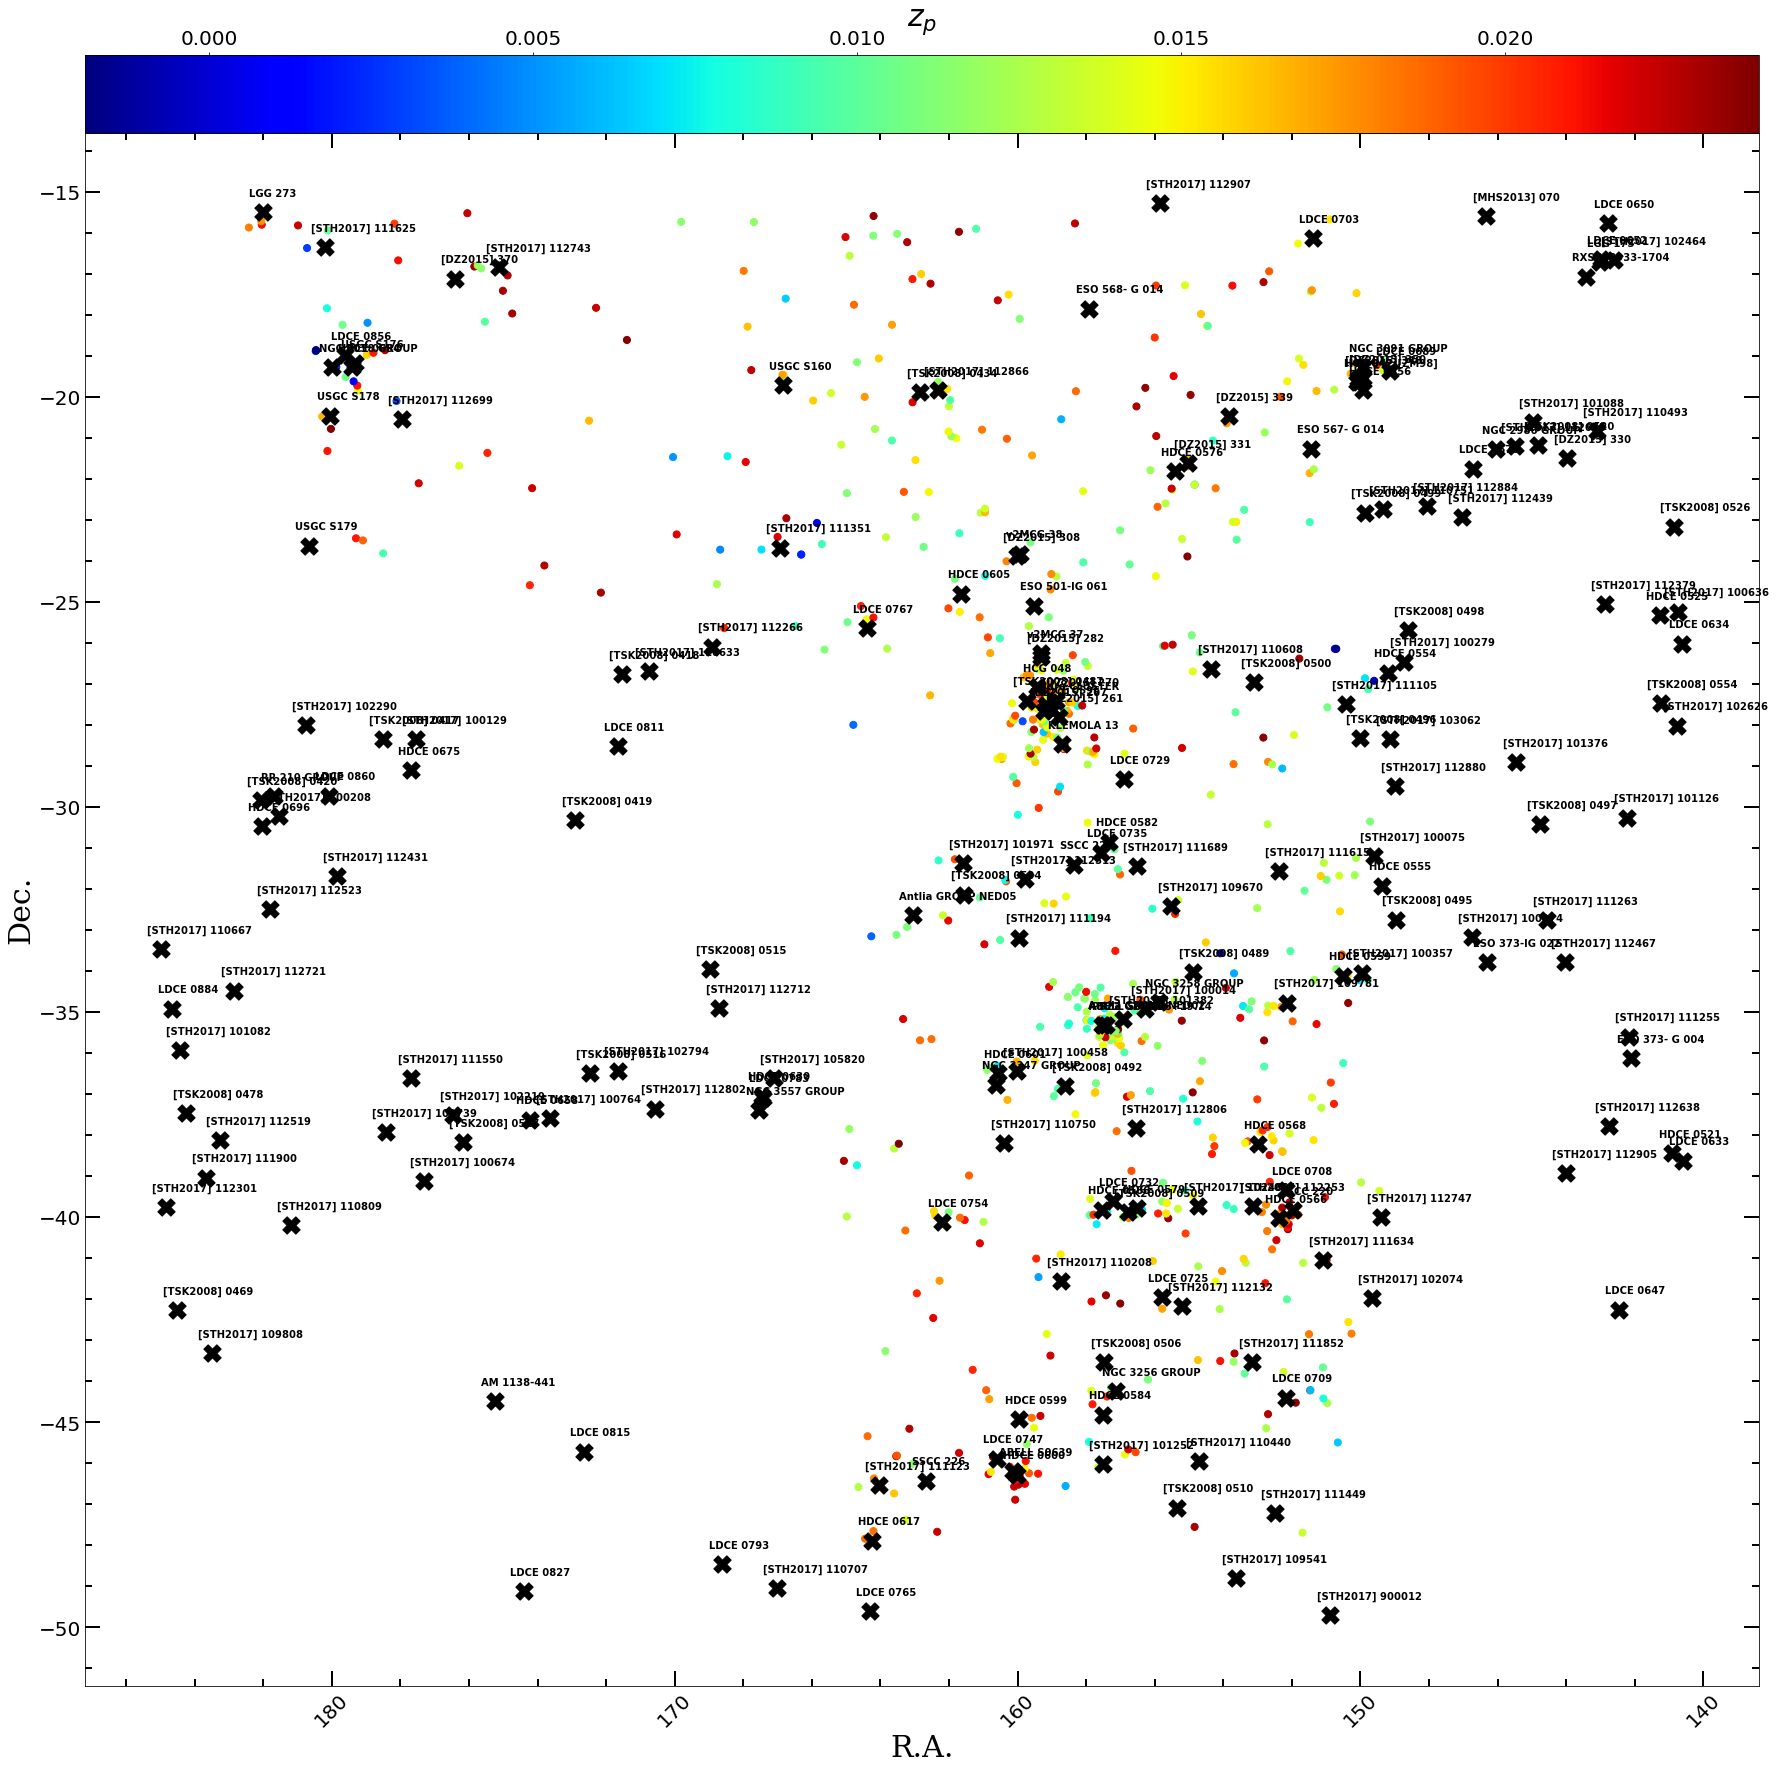

In [11]:
fig = plt.figure(figsize=(30, 30))    
ax = fig.add_subplot(111)

sc = ax.scatter(ra_p[mask_galaxies_photoz], dec_p[mask_galaxies_photoz], c=zml[mask_galaxies_photoz], cmap=cm1, s=50)



dx = 0.4
for ra_i, dec_i, text in zip(ra_g[mask_groups], dec_g[mask_groups], objname_g[mask_groups]):
    ax.scatter(ra_i, dec_i, marker='X', s = 300, color="black", zorder=3)
    ax.text(ra_i+dx, dec_i+dx, s=text, fontsize=10, fontweight='bold', color='black', zorder=4)

ax.tick_params(which='both', width=2.0)
ax.tick_params(which='major', length=15)
ax.tick_params(which='minor', length=7)
ax.yaxis.set_tick_params(which='both',labelsize=labelsize, direction='in',color=tick_color,bottom=True,top=True,left=True,right=True)
ax.xaxis.set_tick_params(which='both',labelsize=labelsize, direction='in',color=tick_color,bottom=True,top=True,left=True,right=True, rotation=45)
ax.minorticks_on()  
ax.invert_xaxis()

divider = make_axes_locatable(ax)
cax1 = divider.append_axes('top', size='5%', pad=0)
cbar = fig.colorbar(sc, cax=cax1, orientation='horizontal')
cbar.set_label(label=r"$z_p$", fontsize=fontsize, position="top")
cbar.ax.tick_params(labelsize=labelsize)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')
    
ax.set_xlabel("R.A.", fontsize=fontsize, family = 'serif')
ax.set_ylabel("Dec.", fontsize=fontsize, family = 'serif')

The matter is that with the current approach, we are getting too many clusters and groups for too few galaxies. I just don't know how to deal with this much of clusters and groups for so few galaxies. How to proceed?

#### From this point on I decided to work with groups and clusters from a "mega compilation" of groups and clusters from the literature. This is in the notebook "groups_and_clusters_catalogue".